In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb


# pd.datetime(df.column, unit ='ms')

In [1]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [ ]:
# import data_analysis_function

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [7]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [37]:
import json
#import collections
import os
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

from dataset_analysis import create_dataframe, create_dateTime, create_month
from dataset_analysis import specific_month_df, drop_month_year, alter_time, rearrange_frame
from dataset_analysis import check_A_B_blast_furnace_1, no_zero_value_in_target_1, dataframe_reset_index
from dataset_analysis import drop_nan_value, drop_unique_valued_columns, drop_string_column, dataframe_datetime

from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
# from dataset_analysis import dataframe_date_time_type
from dataset_analysis import draw_graph
# from dataset_analysis import draw_feature_vs_target

In [41]:
from model_file import make_dataset, scikit_learn_model
from model_file import plot_graph, evaluation_metrices
from model_file import NN_model
from model_file import make_dataset_LSTM, split_sequence, LSTM_model

In [40]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
feb_march_file = config['DEFAULT']['feb_march_file']

filepath_server_feb_march = config['DEFAULT']['file_path_server_feb_march']
filepath_server_april_may = config['DEFAULT']['file_path_server_april_may']
filepath_server_june_july = config['DEFAULT']['file_path_server_june_july']


start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
required_number_of_test_data = config['DEFAULT']['required_number_of_test_data']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
number_of_step_lstm = config['DEFAULT']['n_steps_lstm']
epochs = config['DEFAULT']['epochs']
batch_size = config['DEFAULT']['batch_size']


print(required_number_of_test_data)

1000


In [4]:
# # import pandas as pd
# # count = 0
# # for data in pd.read_csv(filepath_server,encoding = 'ISO-8859-1',chunksize  = 1000):
# #     count += 1                          # counting the number of chunks
# #     lastlen = len(data)                 # finding the length of last chunk
# # datalength = (count*1000 + lastlen - 1000) # length of total file

# import multiprocessing as mp
# print("Number of processors: ", mp.cpu_count())

In [4]:
initial_dataframe = create_dataframe(filepath_server_april_may)

In [6]:
# temp_frame = initial_dataframe.iloc[-45128:,:]
# temp_frame = initial_dataframe.iloc[-85349:-45128,:]
# temp_frame = initial_dataframe.iloc[-165519:-85349,:]

In [11]:
# temp_frame.to_csv('june_july_1.csv')

In [12]:
# read = create_dataframe('june_july_1.csv')

In [14]:
# read.columns.get_loc('Unnamed: 0')

In [12]:
# read_1 = read.drop(read.columns[0], axis=1)

In [7]:
# read_1.tail(2)

In [5]:
df_1 = create_dateTime(initial_dataframe,'row_ID','Unnamed: 0')
# df_1 = create_dateTime(read_1)

In [ ]:
# def distinct_month_1(dataframe, target_column,month_key):
#     array_df = []
#     for i in month_key:
#         req_data_1=dataframe.loc[(dataframe[target_column]==i)]
#         req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
        
#         array_df.append(req_frame_1)
    
#     return array_df

In [ ]:
# def draw_month(month_key_value, dict_of_month,target_column):
#     for i in month_key_value:
#         value = dict_of_month[i]
#         value.iloc[:].plot(y=[target_column])
#         plt.title('visualization of signal ' + str(target_column) + ' in time of ' + str(i))
#         plt.xlabel('range')
#         plt.ylabel('value')

#         plt.rcParams['figure.figsize'] = (5,5)
#         plt.savefig(str(i) + '.jpg')
#         plt.show()

In [6]:
date_df, month_array_df = create_month(df_1, 'month')

In [13]:
# for i in specific_month_df['month']:
#     print(i)

In [7]:
# def specific_month_df(dataframe,target_column_month):
#     req_data_month=dataframe.loc[(dataframe[target_column_month]==6) | (dataframe[target_column_month]==7)]
# #     req_data_month=dataframe.loc[(dataframe[target_column_month]==2|3) ]
#     req_frame_month=pd.DataFrame(req_data_month,columns=dataframe.columns)
    
#     return req_frame_month

specific_month_df = specific_month_df(date_df,'month')

In [8]:
# def drop_month_year(dataframe):
# #     dataframe = dataframe.drop(['year','month'], axis=1)
#     dataframe = dataframe.reset_index()
#     return dataframe

# spec_month = drop_month_year(date_df)
spec_month = drop_month_year(specific_month_df)

In [75]:
# spec_month = spec_month.iloc[:200,:]

In [ ]:
# df_2.columns.get_loc(target_column)
# print(df_2.columns[4142])
# target_df = df_2.loc[:, df_2.columns[4142]]

In [ ]:
# targ = pd.DataFrame(target_df)

In [ ]:
# df_month = pd.DataFrame(index=df_2.index)

In [ ]:
# df_month['year'] = pd.DatetimeIndex(df_month.index).year

In [ ]:
# df_month['month'] = pd.DatetimeIndex(df_month.index).month

In [ ]:
# df_month

In [ ]:
# df_month_final = pd.concat([df_month, target_df], axis=1)
# df_month_final.head()

In [ ]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(186100, 4239)


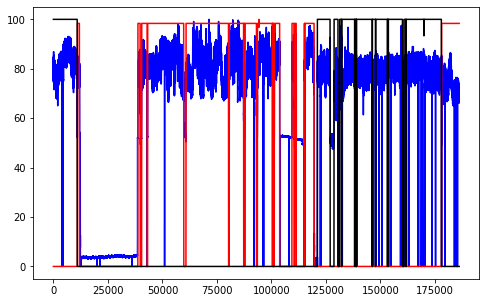

In [27]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'black')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (8, 5)

In [10]:
multivariate_data = alter_time(spec_month, start_pos,spec_month.shape[0])

In [11]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [12]:
dataframe_no_zero_value_blast_furnace = check_A_B_blast_furnace_1(rearranged_dataframe, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1.dtypes

In [ ]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [ ]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [13]:
dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

In [15]:
dataframe_no_zero_value_target_column_2 = dataframe_reset_index(dataframe_no_zero_value_target_column)
print(dataframe_no_zero_value_target_column_2.shape)

(25803, 4241)


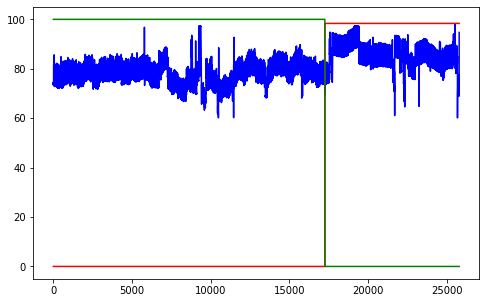

In [17]:
plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (8, 5)

In [ ]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [ ]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [18]:
# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_no_zero_value_target_column_2)

In [49]:
# nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
# cols_to_drop = nunique[nunique == 1].index
# dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [19]:
dataframe_drop_column_with_same_value = drop_unique_valued_columns(multivariate_data_drop_nan)

In [38]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [39]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [40]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [20]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [21]:
dataframe_no_string.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 2927, dtype: object

In [22]:
initial_dataframe = None
date_df = None
specific_month_df = None
spec_month = None
rearranged_dataframe = None
multivariate_data = None
dataframe_no_zero_value_blast_furnace = None
dataframe_no_zero_value_target_column = None
multivariate_data_drop_nan = None
dataframe_drop_column_with_same_value = None

In [ ]:
# dataframe_drop_row_consecutive_same_value = drop_row(dataframe_no_string)

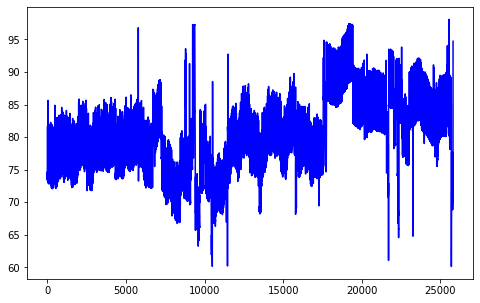

In [23]:
plt.plot(dataframe_no_string[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (8, 5)

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [ ]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [24]:
# Make dataframe with dateTime index
dataframe_datetime = dataframe_datetime(dataframe_no_string)

In [25]:
dataframe_datetime.shape

(25803, 2926)

In [26]:
# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [27]:
# feature selection with Pearson Correlation.
sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [ ]:
# correlation_csv = main_correlation.to_csv('high_correlation_feb_march_april_may.csv')

In [ ]:
# dataframe_datetime.to_csv('dataframe_datetime_feb_march_april_may.csv')

In [28]:
# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

In [29]:
print(dataframe_high_correlation.shape)
dataframe_high_correlation.describe()

(25803, 7)


,AEDAHO_T9_V2,RWWIHOAG9_V0,AEWIGHG9_AG1,AEWIGHG9_AG2,AEWIGHG9_AG3,RWWIHOT9_RV0,AEWIHO_T9AV2
count,25803.000000,2.580300e+04,25803.000000,25803.000000,25803.000000,25803.000000,25803.000000
mean,71.096028,2.720047e+01,88.919653,88.759936,88.439734,42.445311,78.141083
std,8.616362,3.897491e+01,8.988866,8.810919,8.864697,4.697575,5.610088
min,0.000000,0.000000e+00,0.611480,0.424371,0.444625,2.319187,60.132791
25%,66.647384,3.089547e-19,82.376198,82.374550,82.000099,39.174053,74.490757
50%,71.639029,3.089547e-19,84.604202,84.567497,84.199097,41.229058,77.008469
75%,76.781524,8.036454e+01,99.679001,99.068249,98.810997,45.199263,81.603623
max,100.000000,9.807861e+01,100.000000,100.000000,100.000000,81.092811,98.076727


In [31]:
dataframe_high_correlation.head(2)

,AEDAHO_T9_V2,RWWIHOAG9_V0,AEWIGHG9_AG1,AEWIGHG9_AG2,AEWIGHG9_AG3,RWWIHOT9_RV0,AEWIHO_T9AV2
dateTime,,,,,,,
2019-04-01 00:00:00,68.977943,3.089547e-19,82.169800,82.150101,81.789803,37.936164,73.683446
2019-04-01 00:01:00,69.062699,3.089547e-19,81.926804,81.928200,81.556396,37.859602,73.925362


In [ ]:
# multivariate_column_label = ['AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.94


In [ ]:
# for i in dataframe_high_correlation:
#     plt.plot(dataframe_high_correlation[i])
#     plt.title(str(i))
#     plt.show()
    
    
#     # plt.plot(dataframe_high_correlation['AEWIHOBKF_V0'])

In [ ]:
# dataframe_high_correlation_1 = dataframe_high_correlation.drop(['AEWIHOBKF_V0'], axis=1)
# print(dataframe_high_correlation_1.shape)
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [32]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(' has already created',final_directory)
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
 has already created /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder


In [67]:
from datetime import date
today = date.today()
print("Today's date:", today)

Today's date: 2019-09-17


In [68]:
dataframe_high_correlation.shape

(58841, 33)

In [ ]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'+'_'+str(today)
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [43]:
def make_dataset(dataframe, required_number_of_test_data):
    dataset = np.array(dataframe)
    
    go_for_training = int(len(dataset)-required_number_of_test_data)
    print('go_for_training: ', go_for_training)
    print('required_number_of_test_data: ', required_number_of_test_data)
    percentage = go_for_training/int(len(dataset))
    print('percentage: ',percentage)
    
    NumberOfElements = int(len(dataset) * percentage)
    print('Number of Elements for training: ', NumberOfElements)
    print('dataset length: ', len(dataset))

    train_input = dataset[0:NumberOfElements, 0:-1]
    print('train_input shape: ', train_input.shape)
    train_output = dataset[0:NumberOfElements, -1]
    print('train_output shape: ', train_output.shape)

    test_input = dataset[NumberOfElements:len(dataset), 0:-1]
    test_output = dataset[NumberOfElements:len(dataset), -1]
    

    #test_input = test_input[0:200]
    #test_output = test_output[0:200]
    print('test_input shape: ', test_input.shape)
    print('test_output shape: ', test_output.shape)

    return train_input, train_output, test_input, test_output

In [44]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation,required_number_of_test_data)

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

go_for_training:  24803
required_number_of_test_data:  1000
percentage:  0.9612448164942061
Number of Elements for training:  24803
dataset length:  25803
train_input shape:  (24803, 6)
train_output shape:  (24803,)
test_input shape:  (1000, 6)
test_output shape:  (1000,)


In [45]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

metrics file removed and created


------- LinearRegression


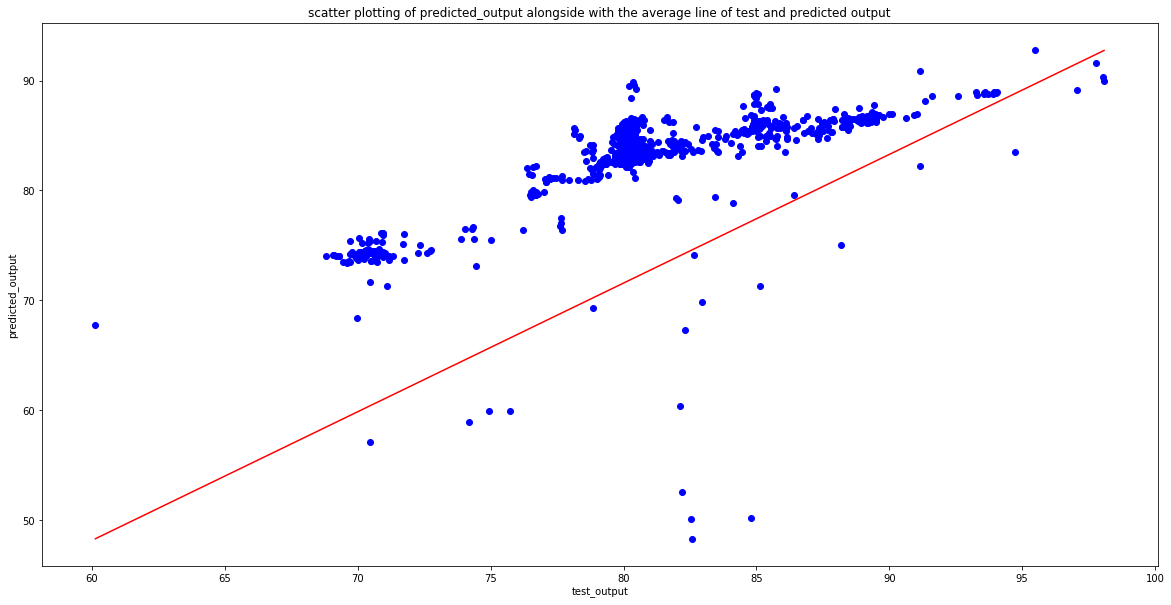

<class 'numpy.ndarray'>


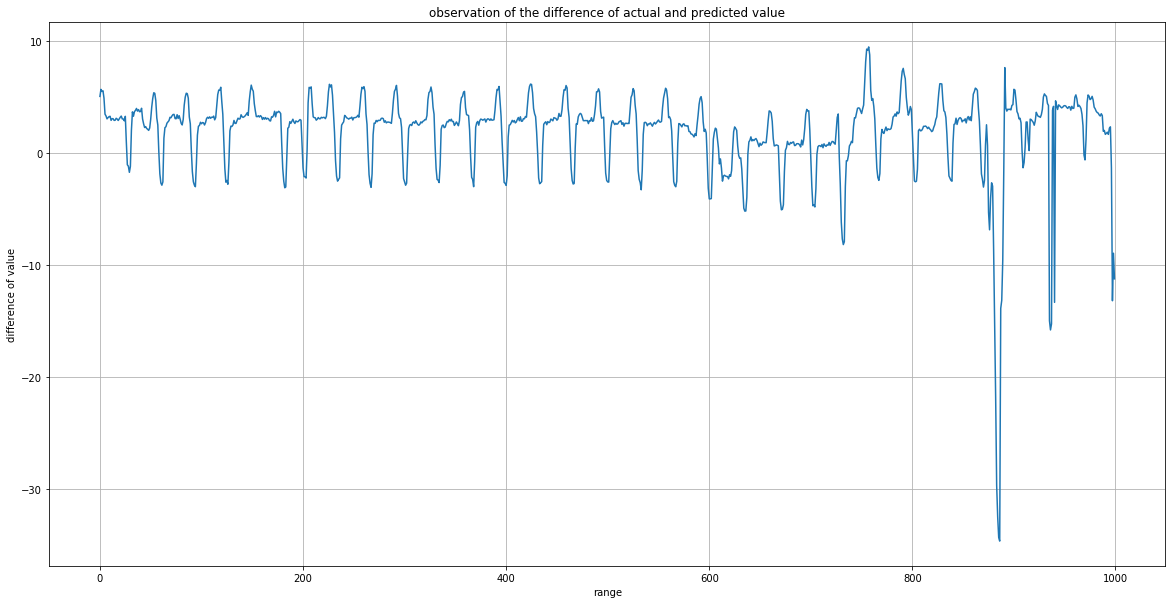

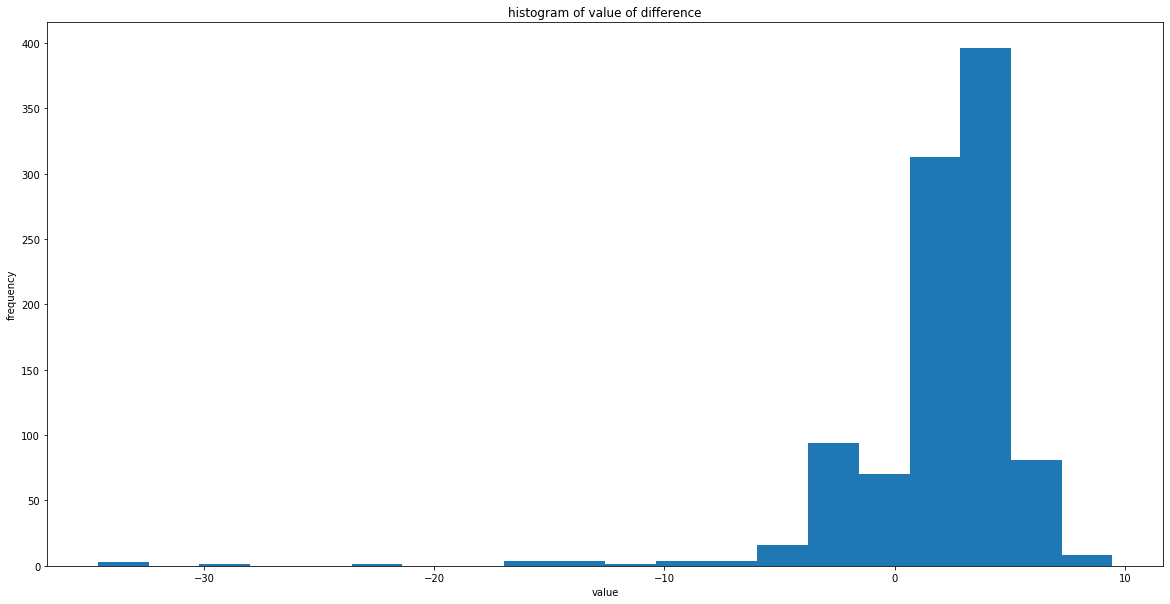

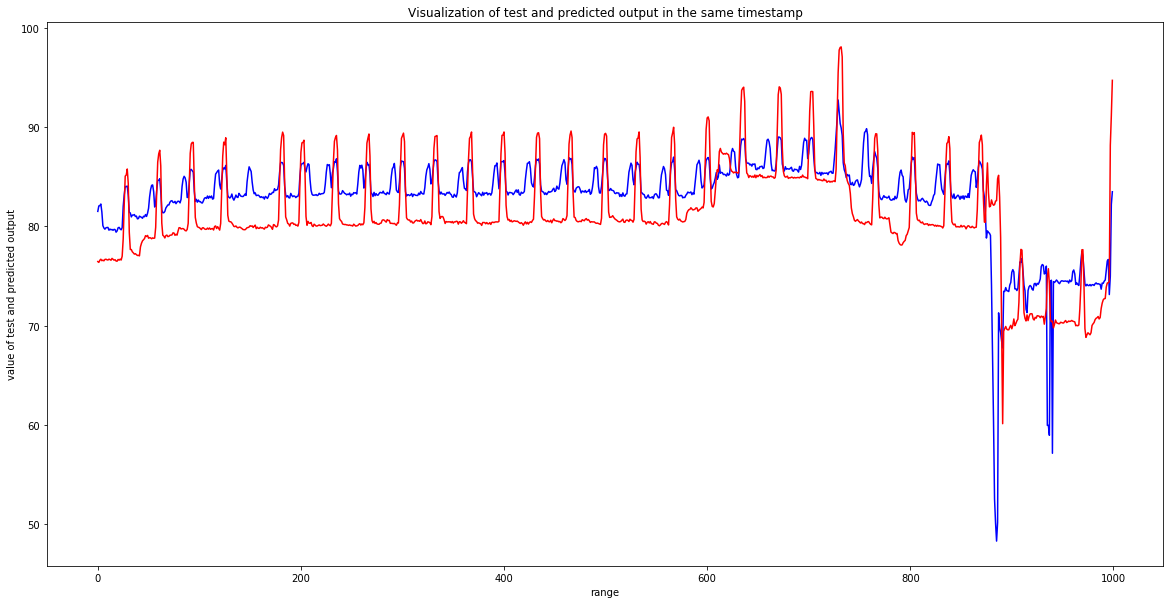

r_2 statistic: 0.27
Mean_absolute_error: 3.26
Mean squared error: 17.74
RMSE:  4.212408832861384
!!!!---------------!!!!----------------!!!!
------- Lasso


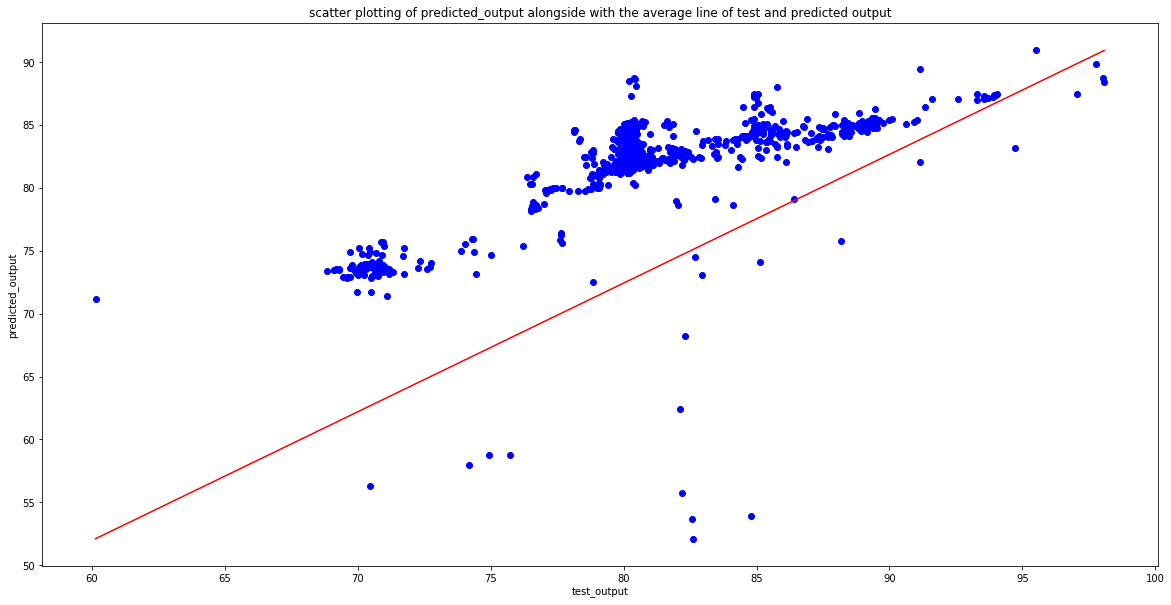

<class 'numpy.ndarray'>


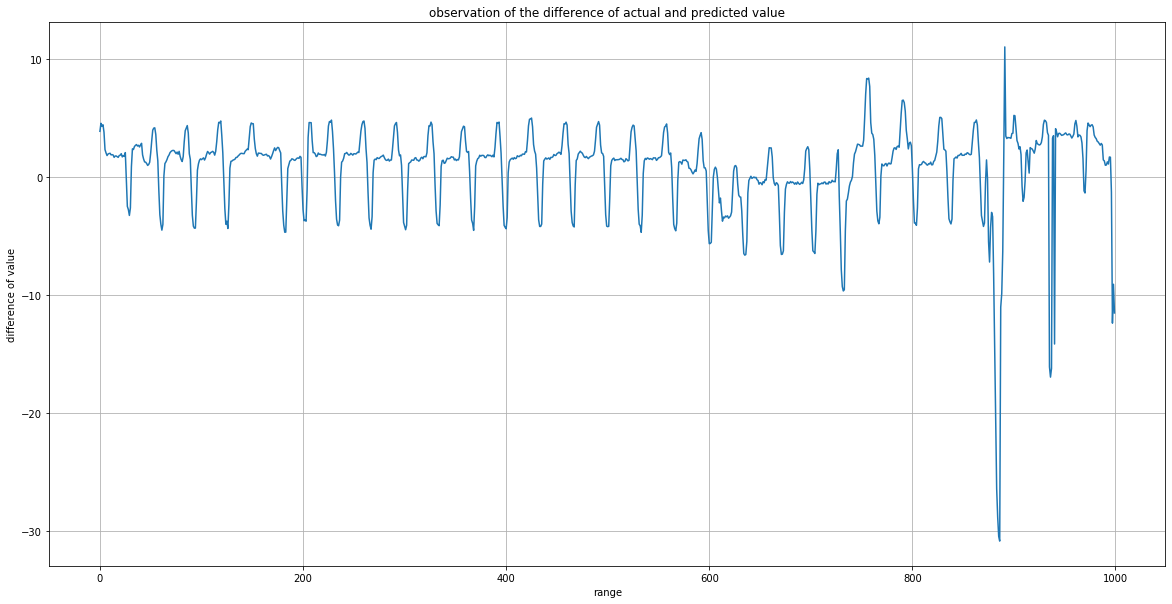

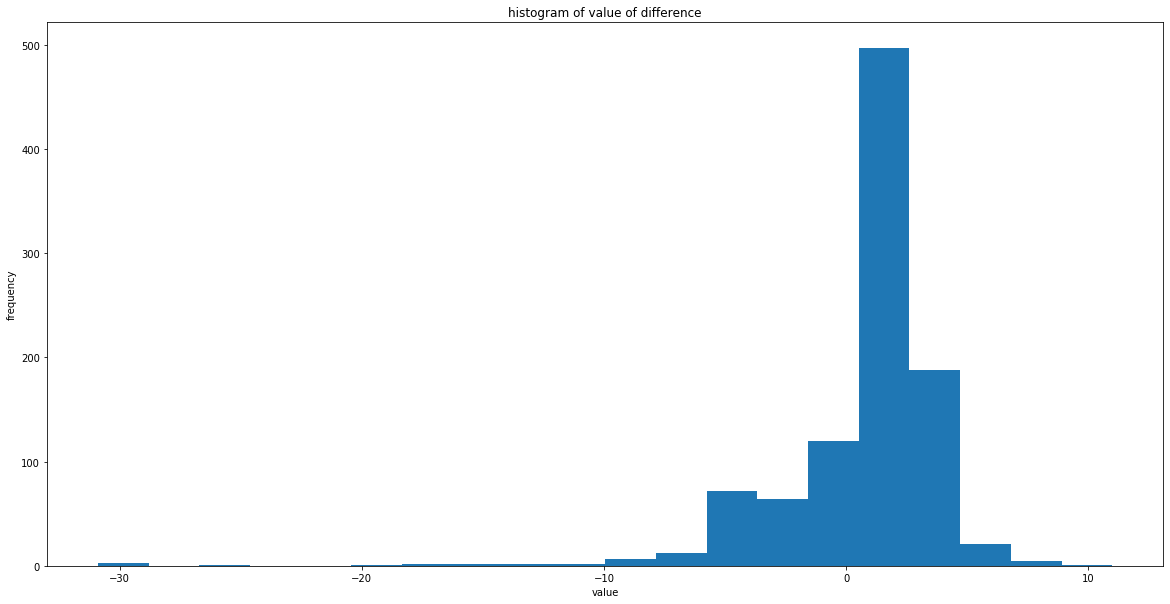

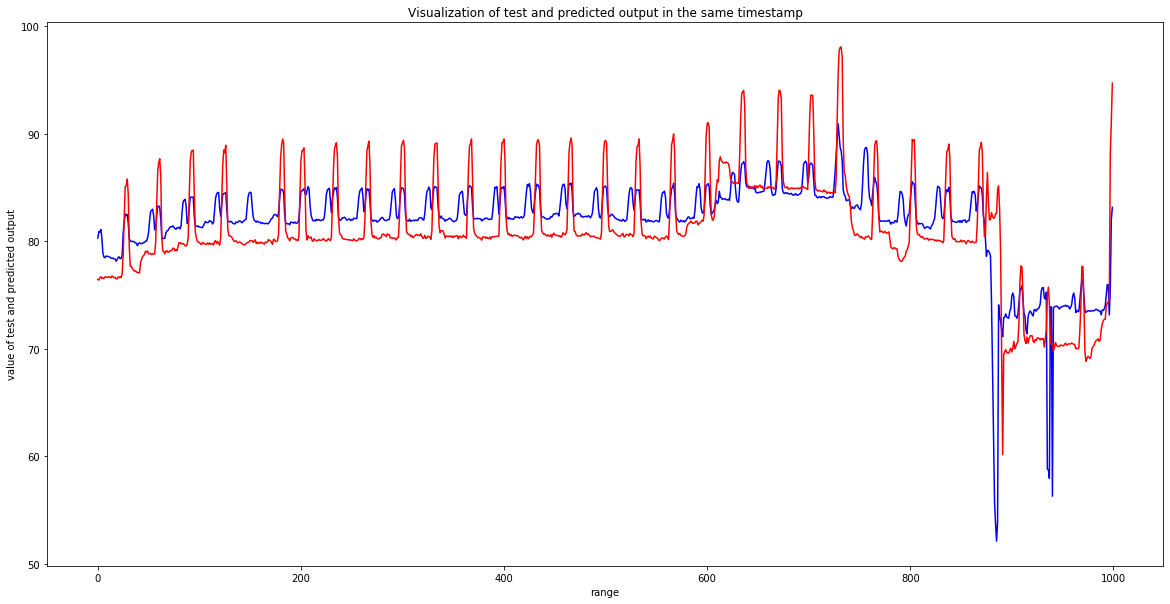

r_2 statistic: 0.44
Mean_absolute_error: 2.62
Mean squared error: 13.51
RMSE:  3.6754406438809277
!!!!---------------!!!!----------------!!!!
------- Ridge


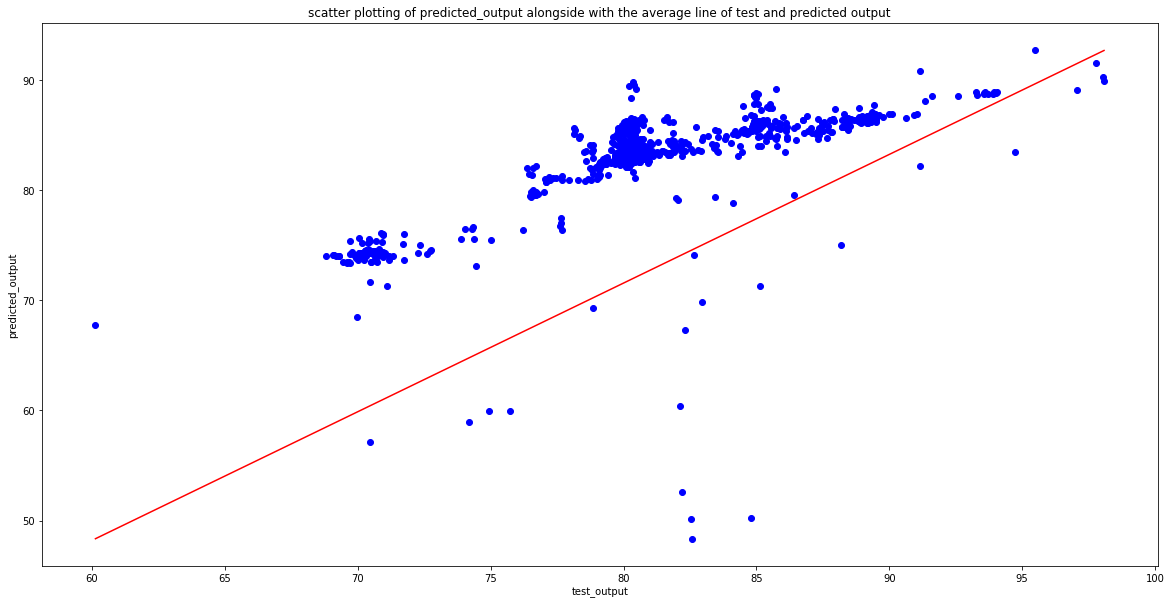

<class 'numpy.ndarray'>


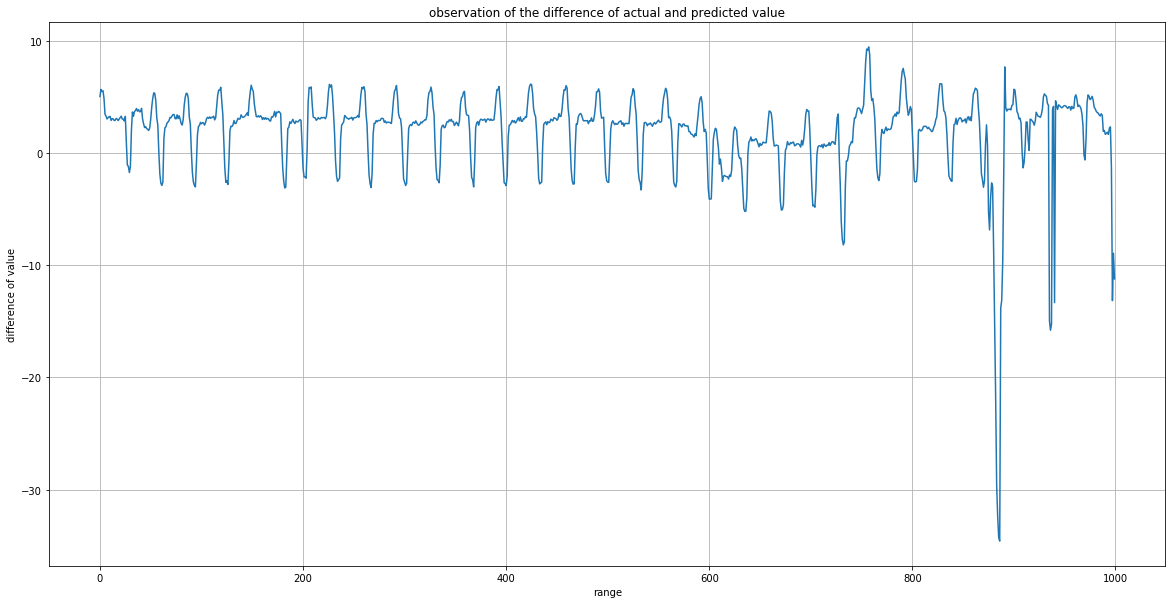

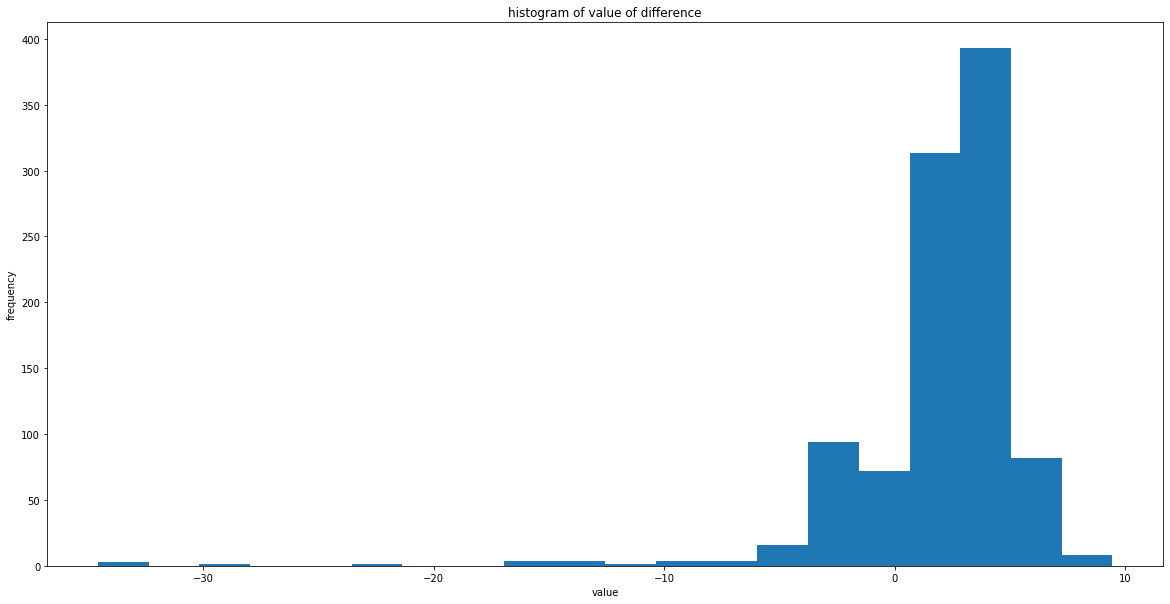

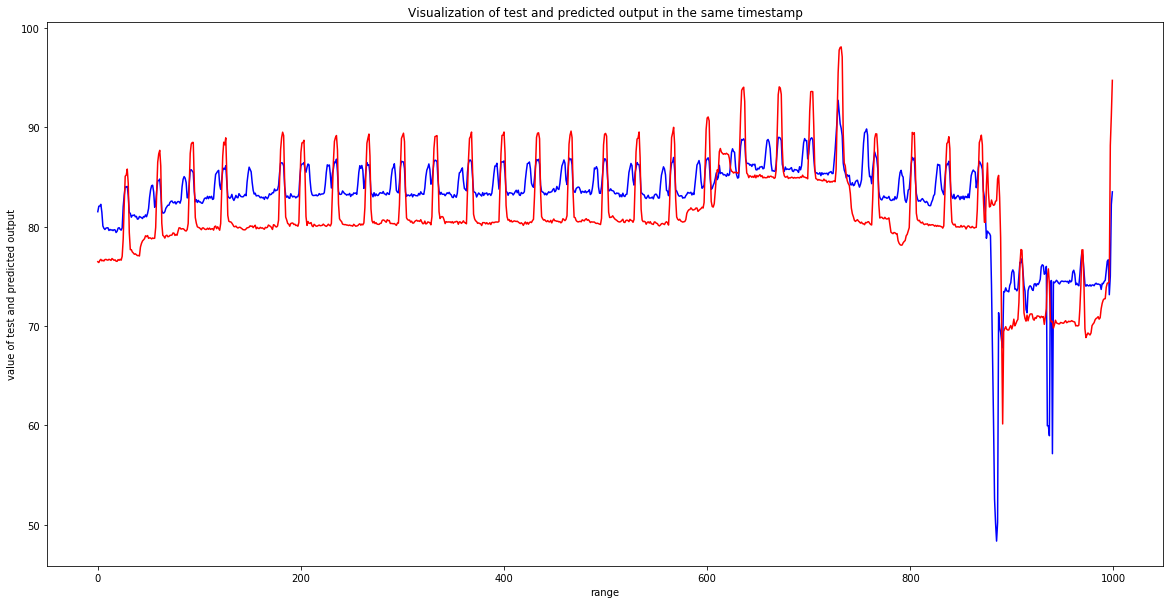

r_2 statistic: 0.27
Mean_absolute_error: 3.24
Mean squared error: 17.65
RMSE:  4.201436725151205
!!!!---------------!!!!----------------!!!!
------- BayesianRidge


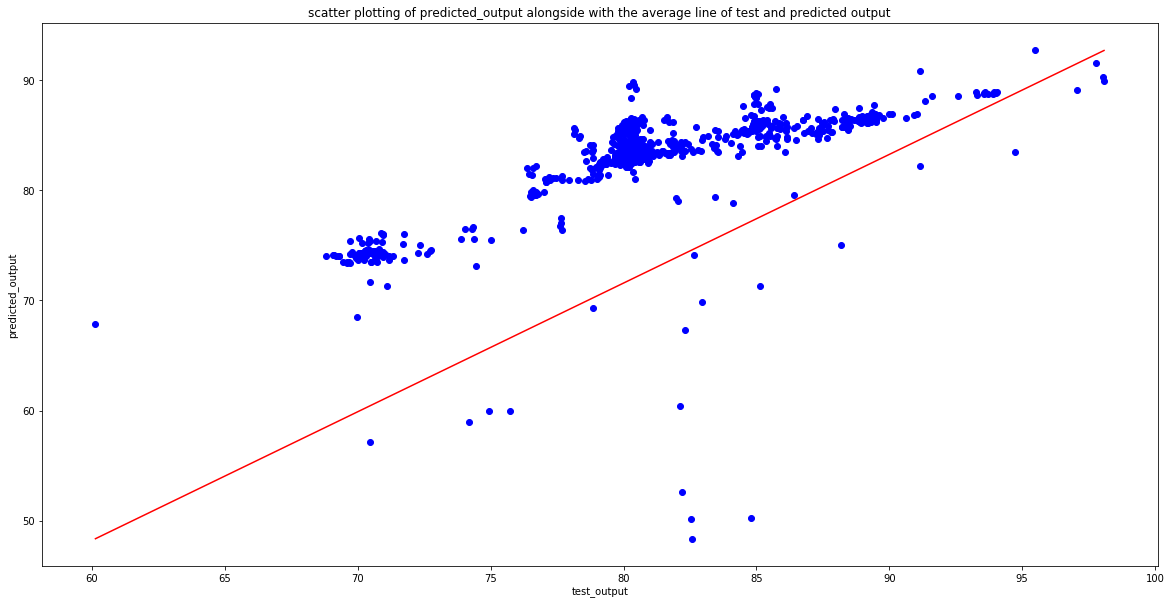

<class 'numpy.ndarray'>


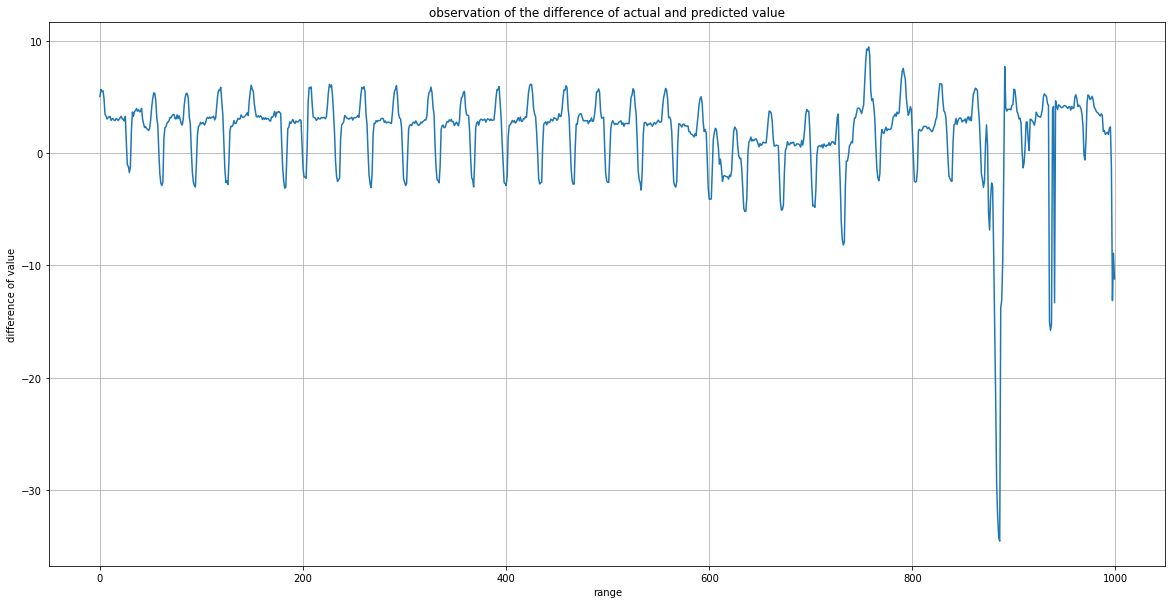

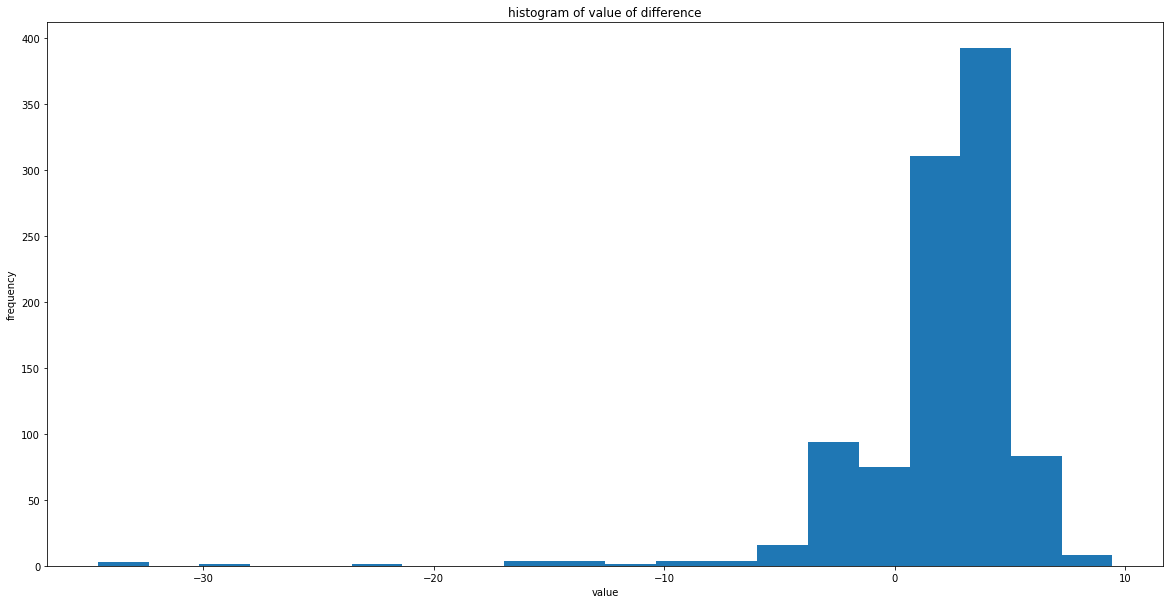

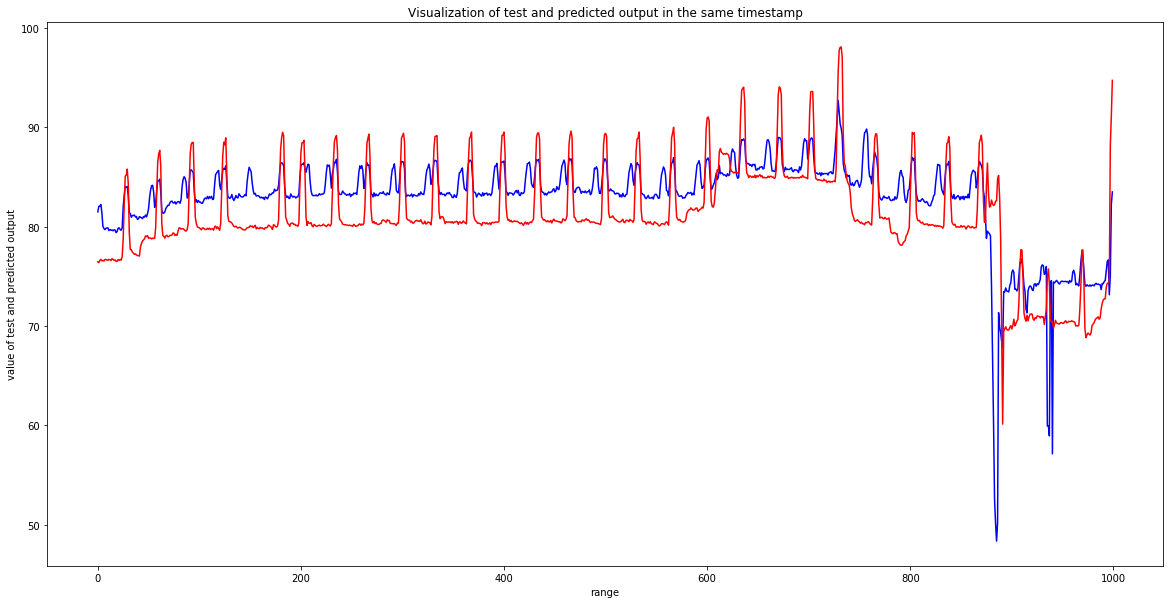

r_2 statistic: 0.27
Mean_absolute_error: 3.24
Mean squared error: 17.62
RMSE:  4.197137212063813
!!!!---------------!!!!----------------!!!!
------- tree


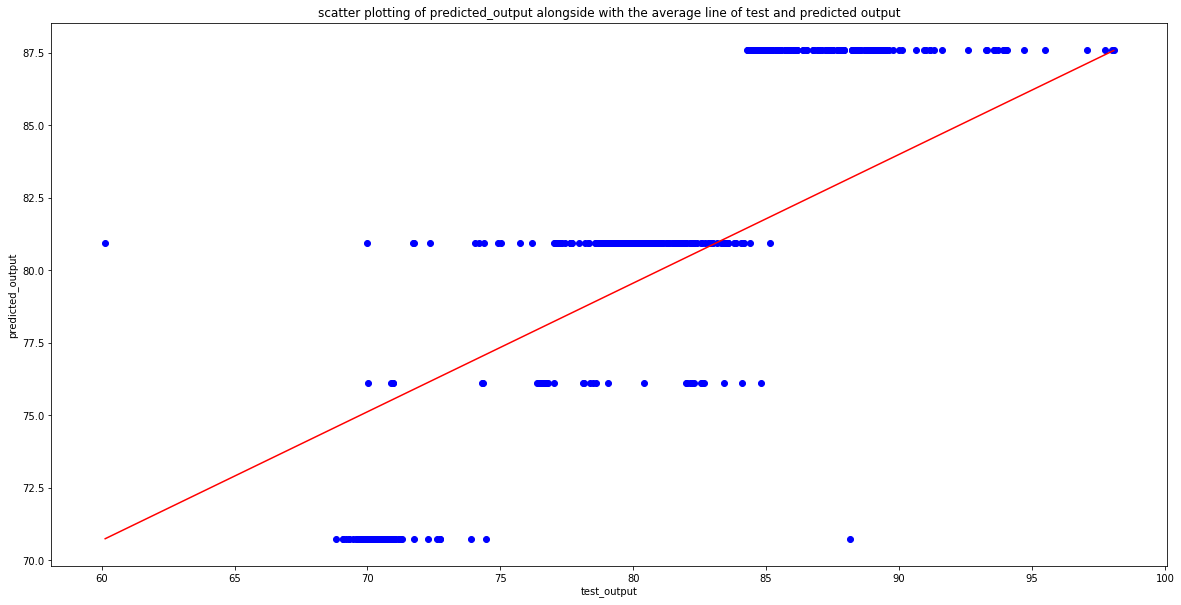

<class 'numpy.ndarray'>


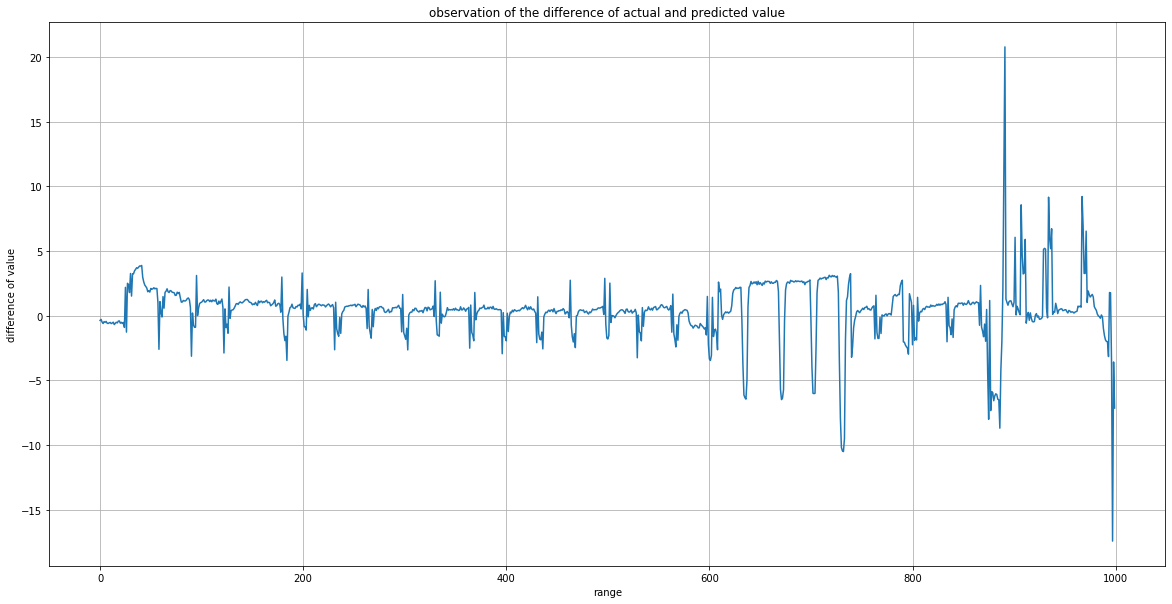

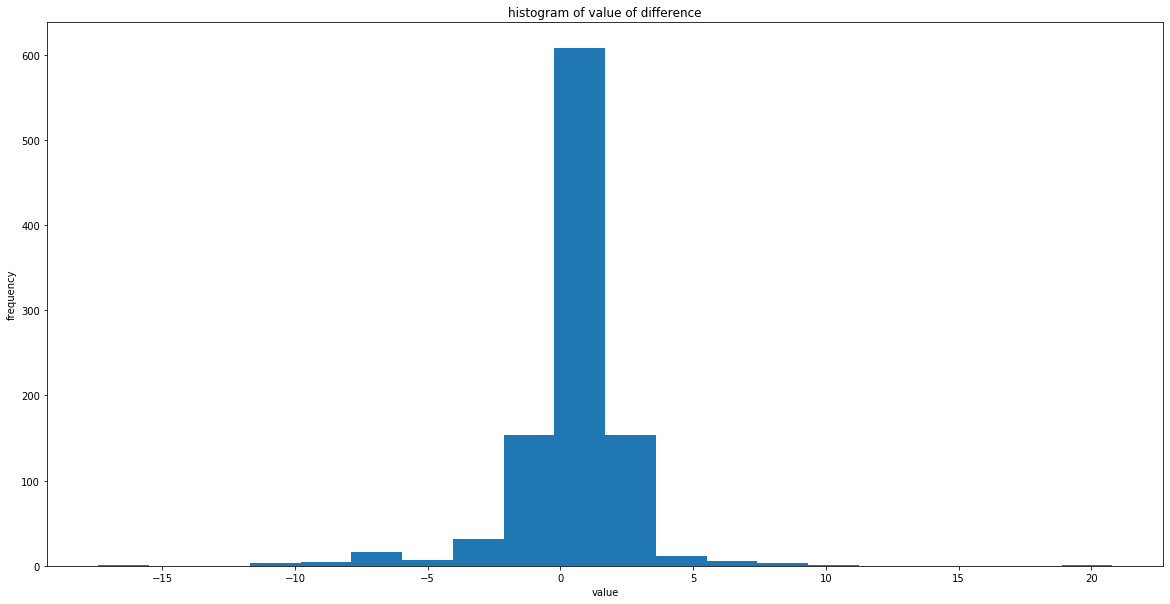

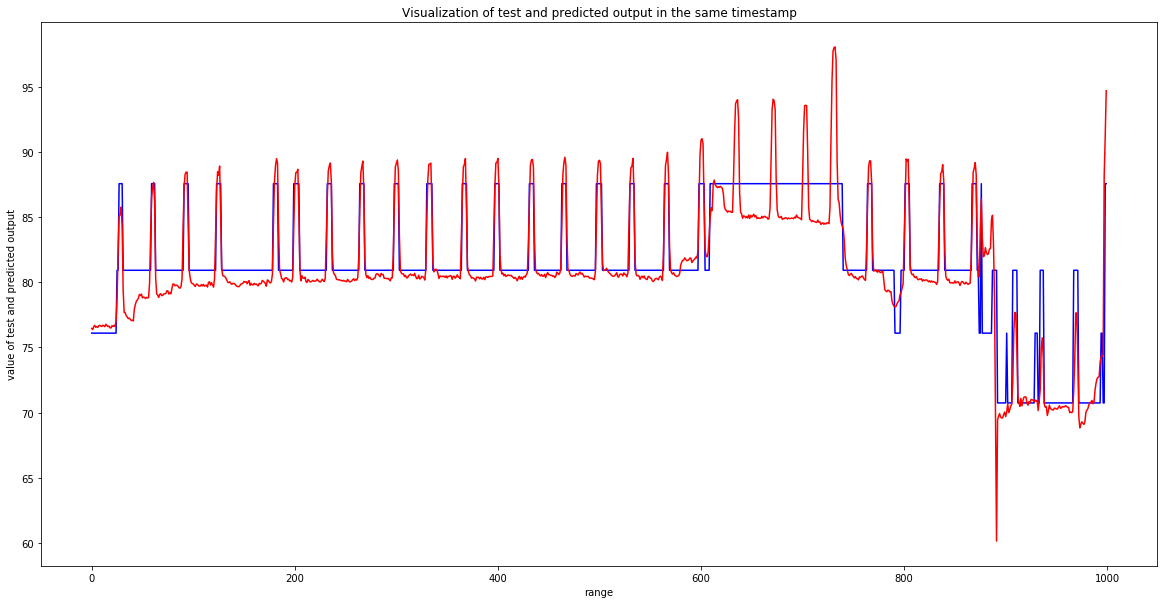

r_2 statistic: 0.80
Mean_absolute_error: 1.39
Mean squared error: 4.82
RMSE:  2.195627471846558
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


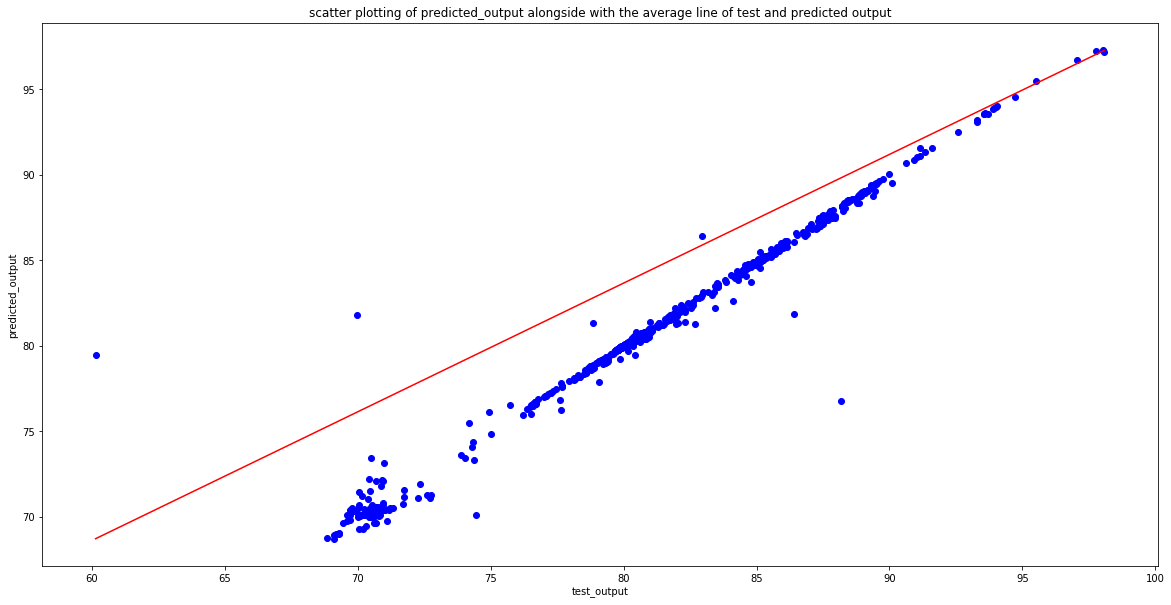

<class 'numpy.ndarray'>


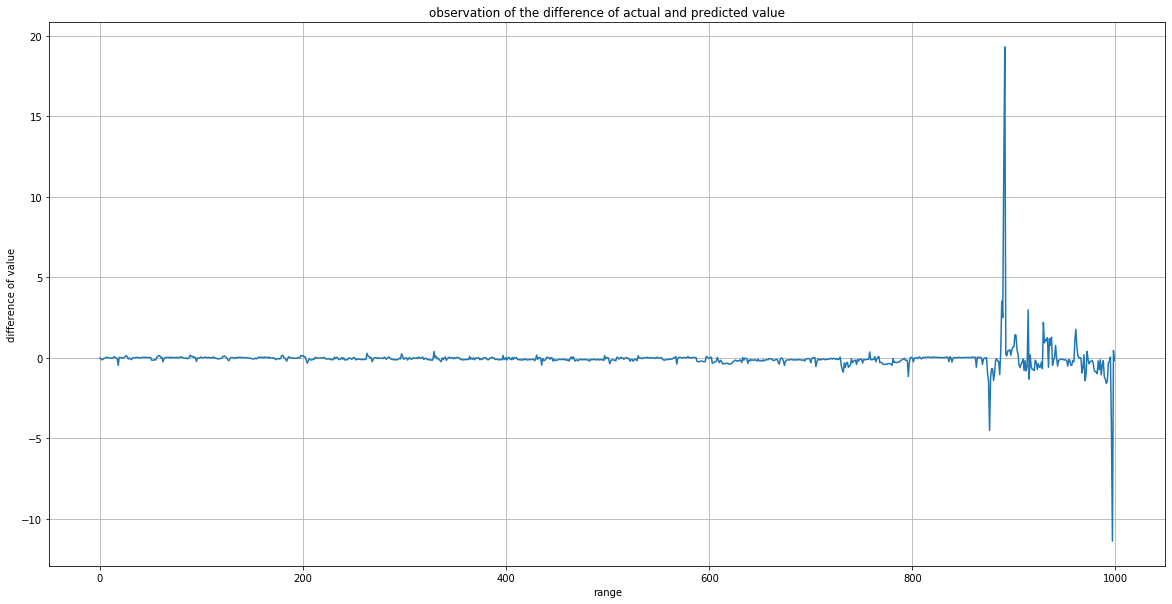

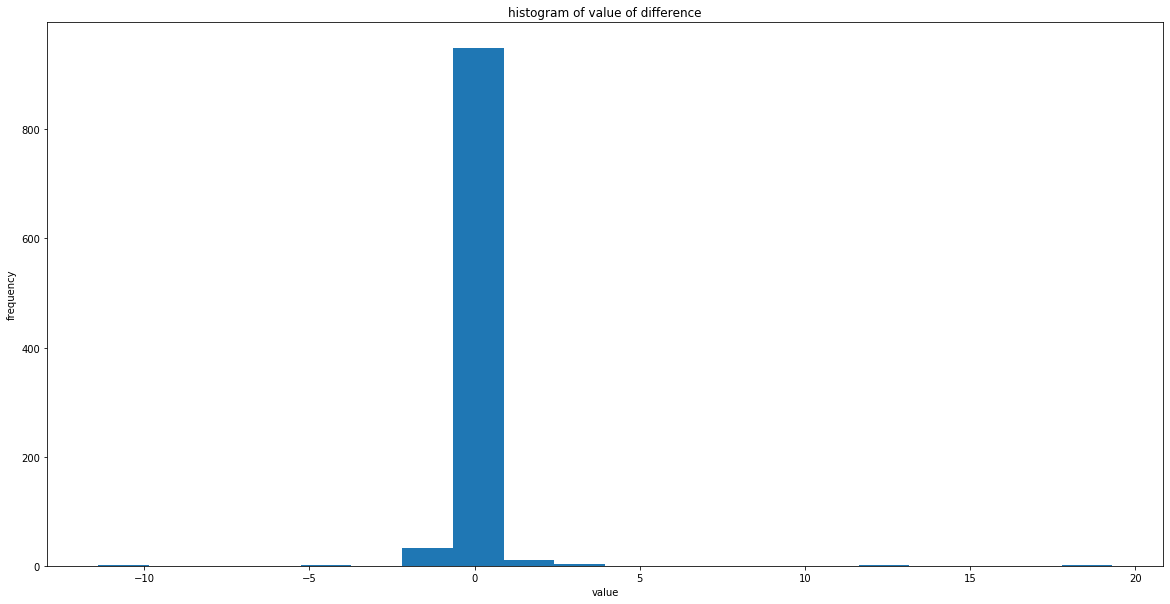

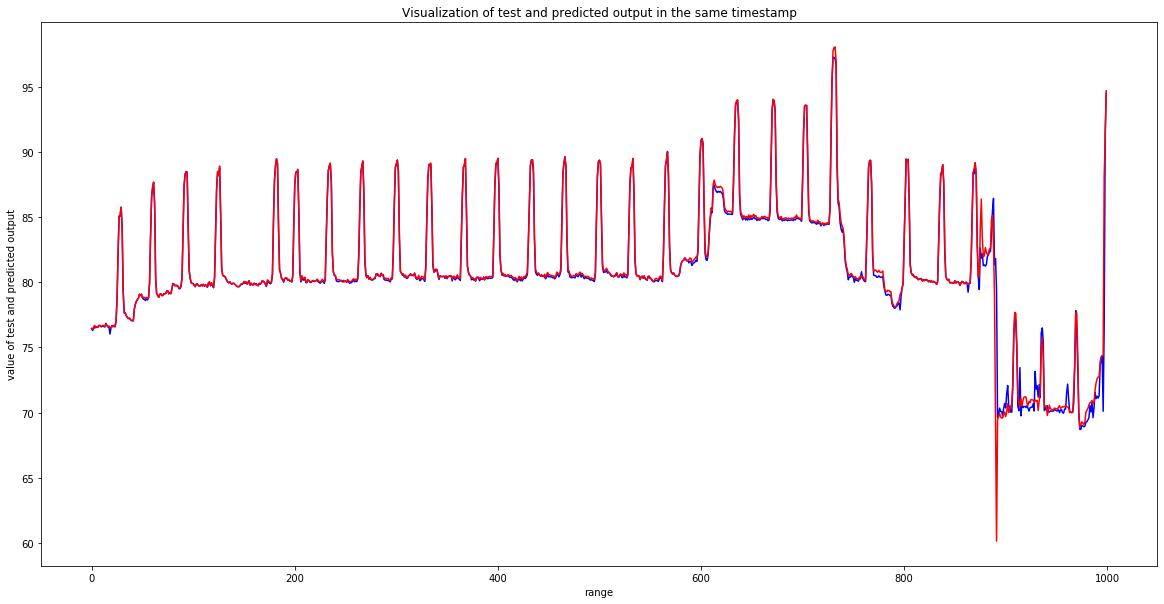

r_2 statistic: 0.97
Mean_absolute_error: 0.22
Mean squared error: 0.79
RMSE:  0.8907740425511556
!!!!---------------!!!!----------------!!!!
------- BaggingRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-pa

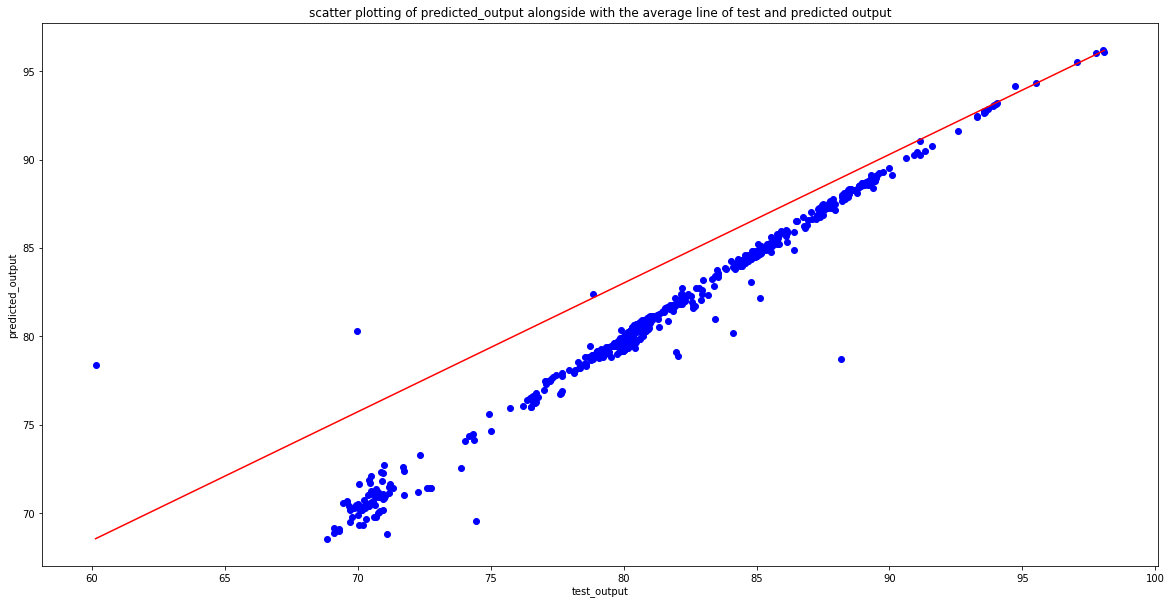

<class 'numpy.ndarray'>


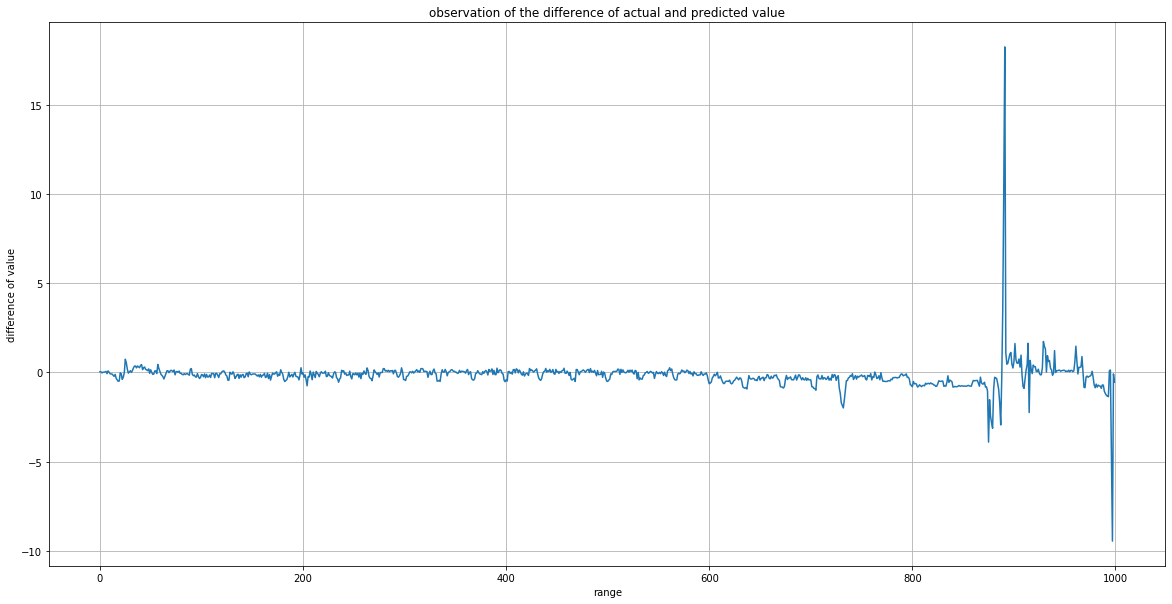

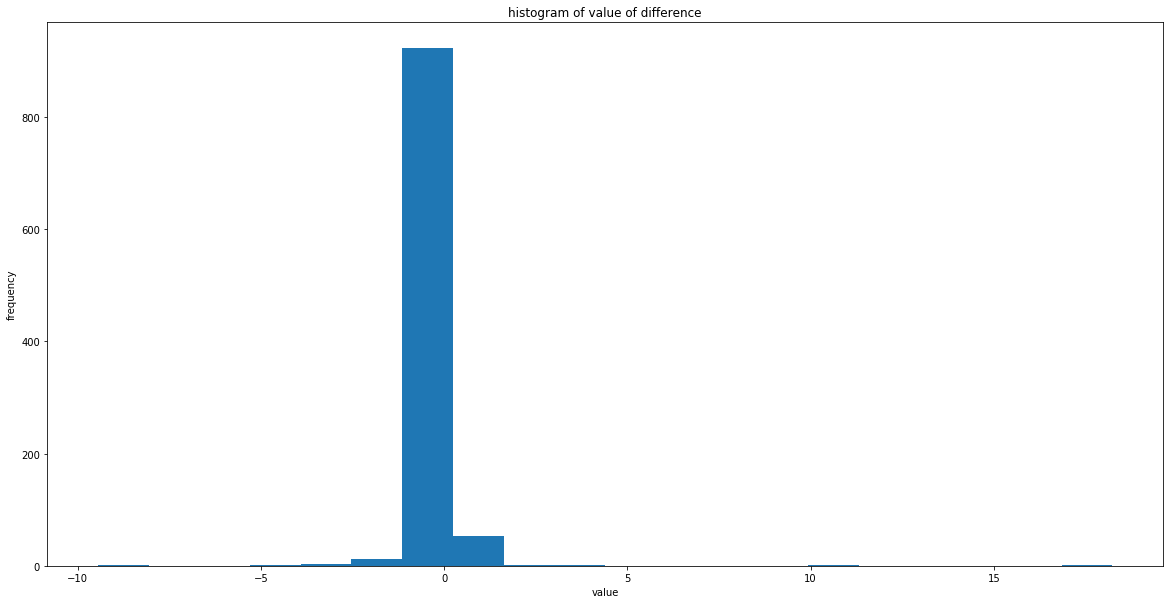

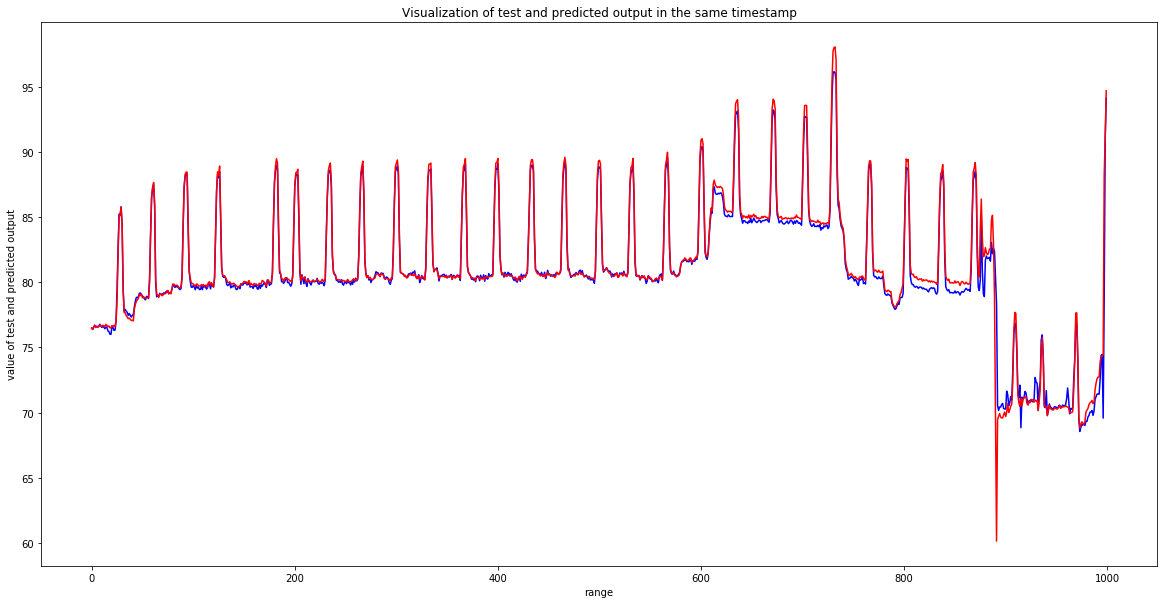

r_2 statistic: 0.97
Mean_absolute_error: 0.34
Mean squared error: 0.78
RMSE:  0.8829291947612828
!!!!---------------!!!!----------------!!!!
------- GBR


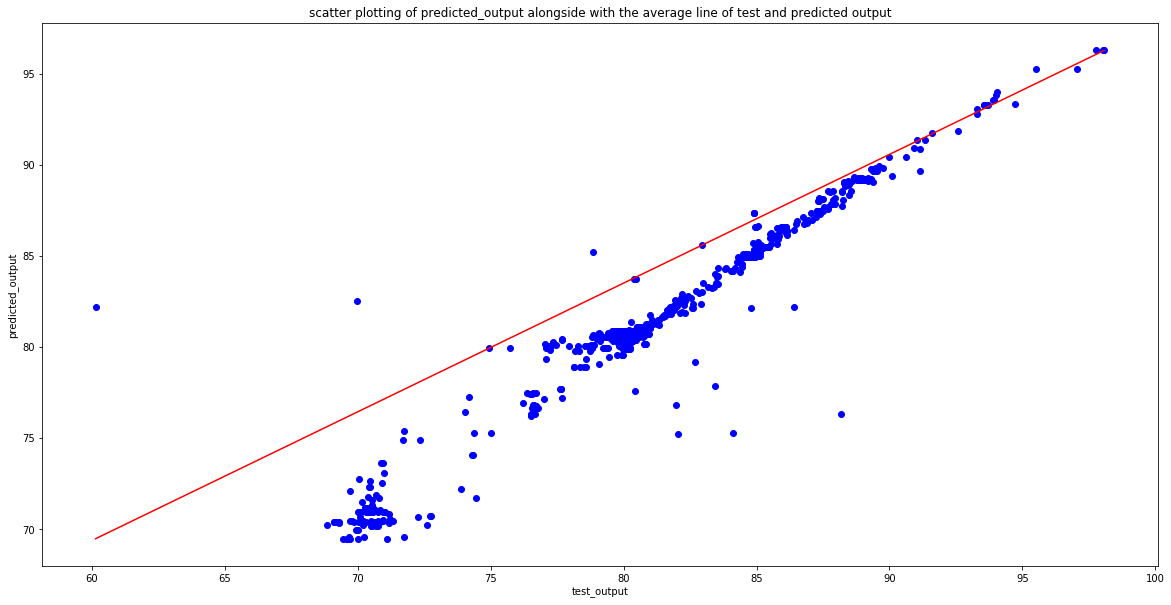

<class 'numpy.ndarray'>


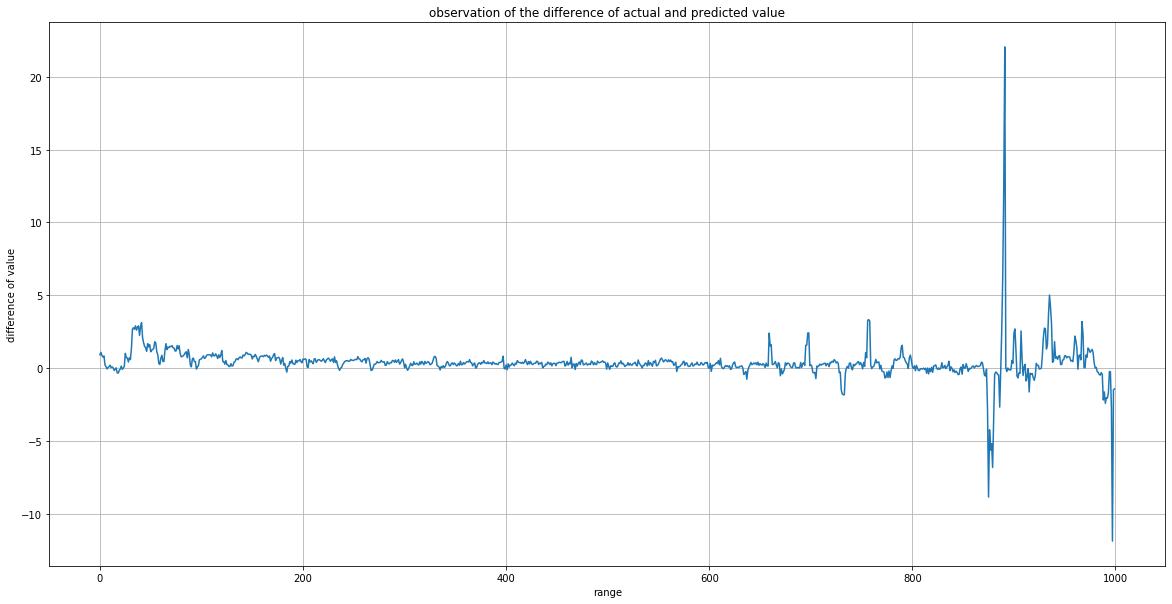

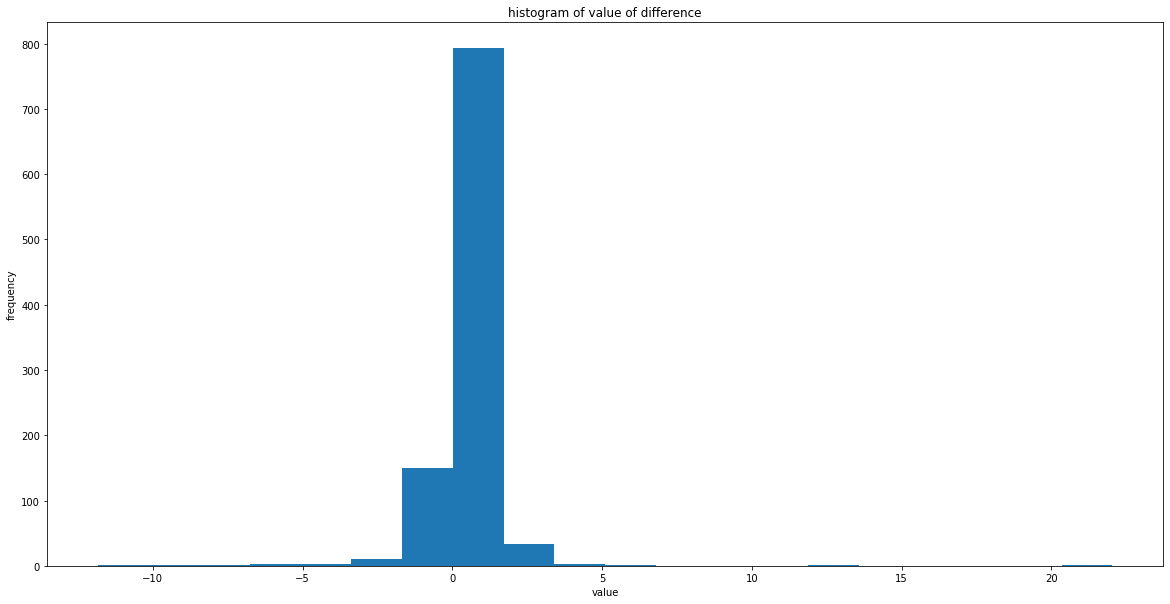

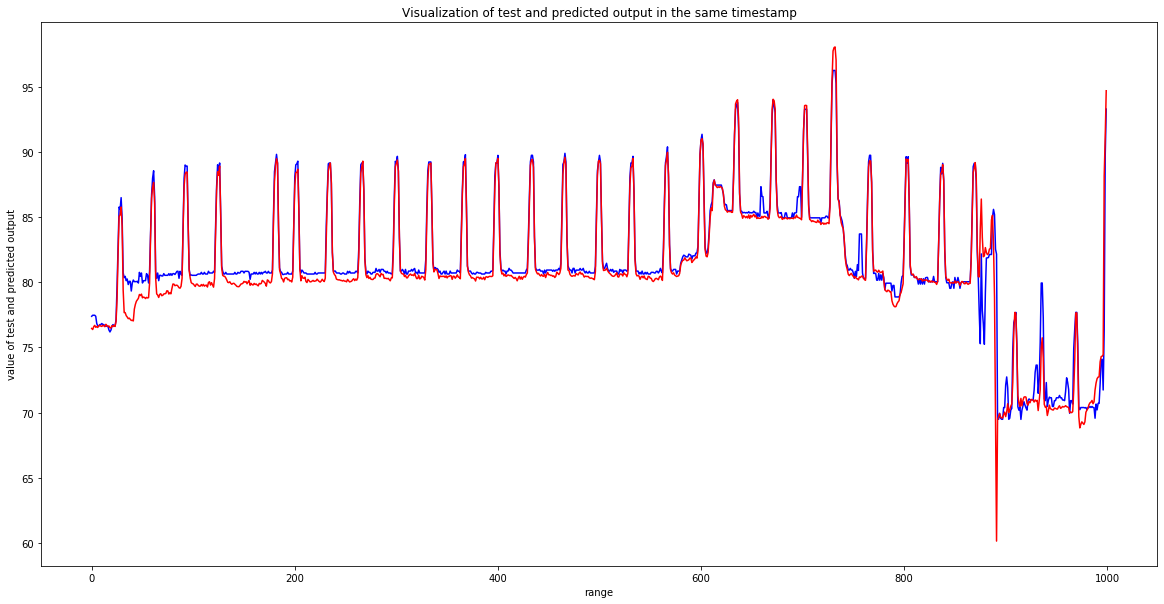

r_2 statistic: 0.93
Mean_absolute_error: 0.61
Mean squared error: 1.65
RMSE:  1.2842477787848523
!!!!---------------!!!!----------------!!!!


In [46]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
# rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
# print(type(rowData))
# print(rowData.shape)
# rowData.head(3)

dataframe_high_correlation.tail()

In [ ]:
df = dataframe_date_time_type(dataframe_high_correlation)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = '3_date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = '3_week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = '3_day_fig_target')

In [ ]:
import sklearn

In [ ]:
my_model = sklearn.tree.ExtraTreeRegressor()
my_model.fit(train_input, train_output)

In [ ]:
my_pred = my_model.predict(test_input)

In [ ]:
plt.plot((min(test_output), max(test_output)), (min(my_pred), max(my_pred)), color='red')
plt.scatter(test_output, my_pred, color='blue')

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,my_pred))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,my_pred))
print("Mean squared error: %.2f" % mean_squared_error(test_output,my_pred))
RMSE=math.sqrt(mean_squared_error(test_output,my_pred))
print('RMSE: ',RMSE)

# Neural Network

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [75]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 169,089
Trainable params: 169,089
Non-trainable params: 0
_________________________________________________________________


In [76]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

W0917 21:48:52.033883 140169774753600 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:958: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0917 21:48:52.043620 140169774753600 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:680: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/30
58341/58341 [==============================] - 7s 115us/step - loss: 2.6068 - mean_absolute_error: 2.6068 - acc: 0.0000e+00
Epoch 2/30
58341/58341 [==============================] - 6s 109us/step - loss: 1.5846 - mean_absolute_error: 1.5846 - acc: 0.0000e+00
Epoch 3/30
58341/58341 [==============================] - 6s 109us/step - loss: 1.3501 - mean_absolute_error: 1.3501 - acc: 1.7141e-05
Epoch 4/30
58341/58341 [==============================] - 6s 108us/step - loss: 1.2702 - mean_absolute_error: 1.2702 - acc: 0.0000e+00
Epoch 5/30
58341/58341 [==============================] - 6s 110us/step - loss: 1.1777 - mean_absolute_error: 1.1777 - acc: 0.0000e+00
Epoch 6/30
58341/58341 [==============================] - 6s 109us/step - loss: 1.1559 - mean_absolute_error: 1.1559 - acc: 0.0000e+00
Epoch 7/30
58341/58341 [==============================] - 6s 109us/step - loss: 0.9998 - mean_absolute_error: 0.9998 - acc: 0.0000e+00
Epoch 8/30
58341/58341 [==============================]

In [77]:
predicted_output_NN = NN_model.predict(test_input)

In [78]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output_NN))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output_NN))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output_NN))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output_NN))
print('RMSE: ',RMSE)

r_2 statistic: 0.82
Mean_absolute_error: 1.06
Mean squared error: 1.77
RMSE:  1.3285846495454539


In [79]:
test_output_NN = np.reshape(test_output,(-1,1))
test_output_NN.shape

(500, 1)

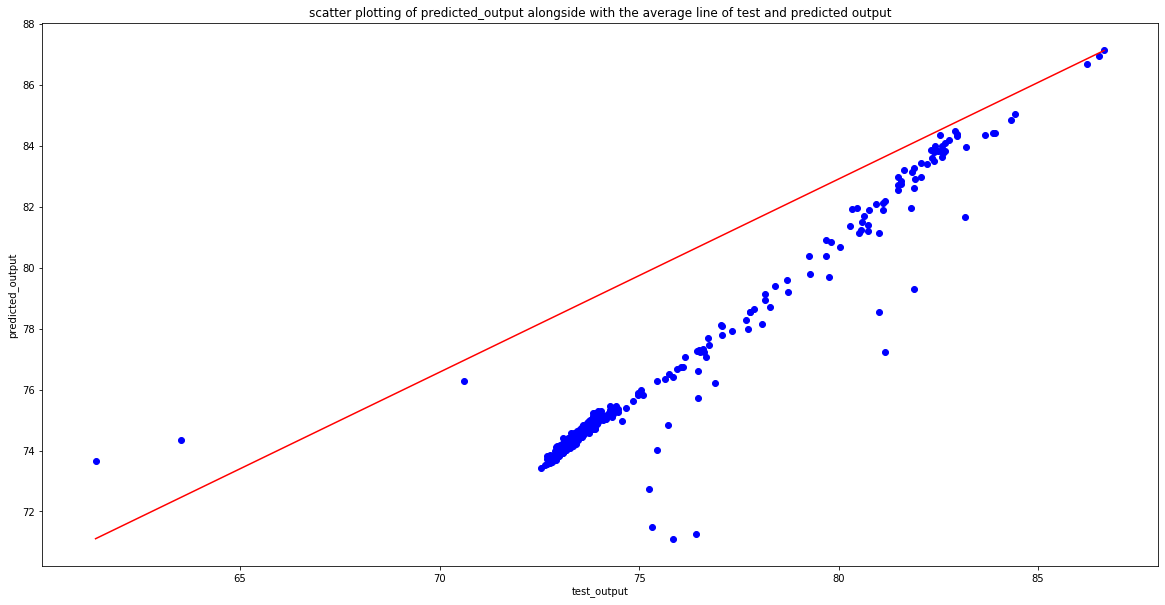

<class 'numpy.ndarray'>


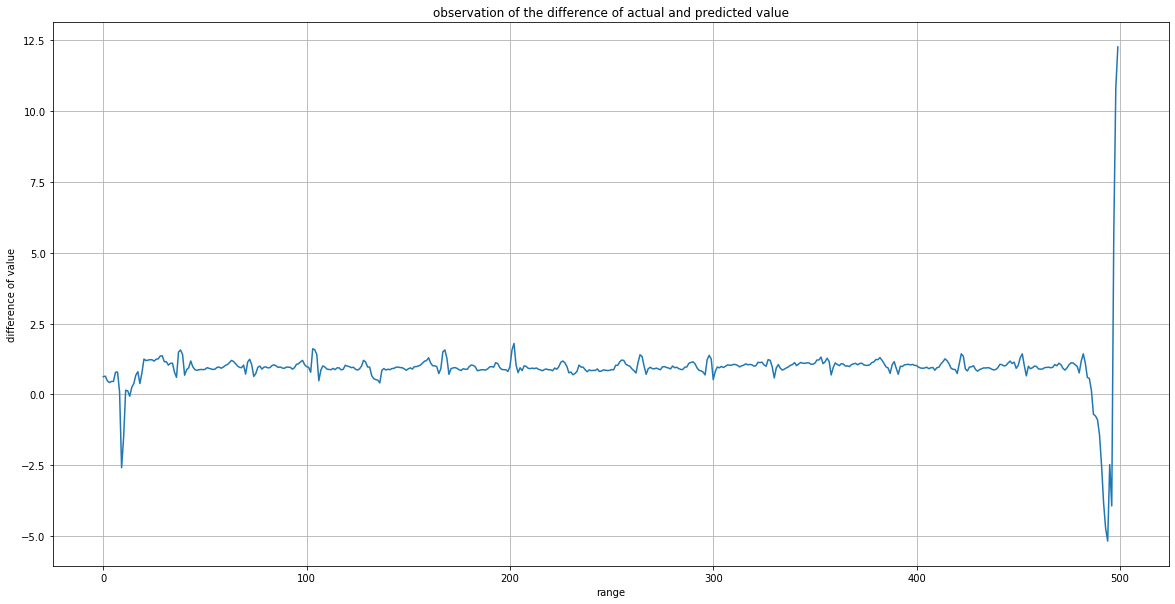

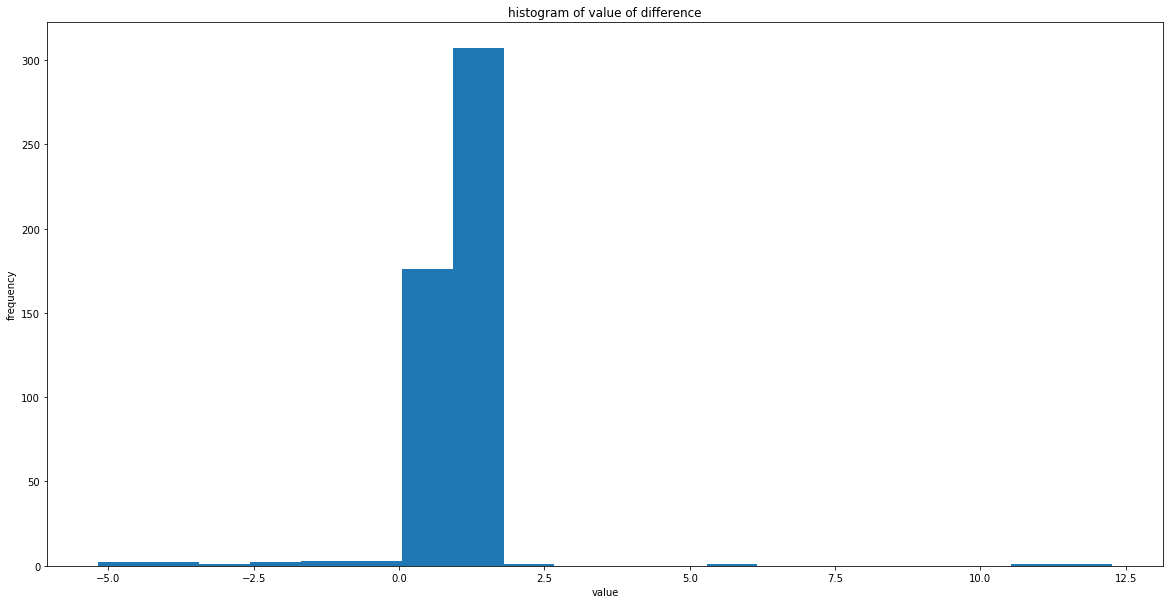

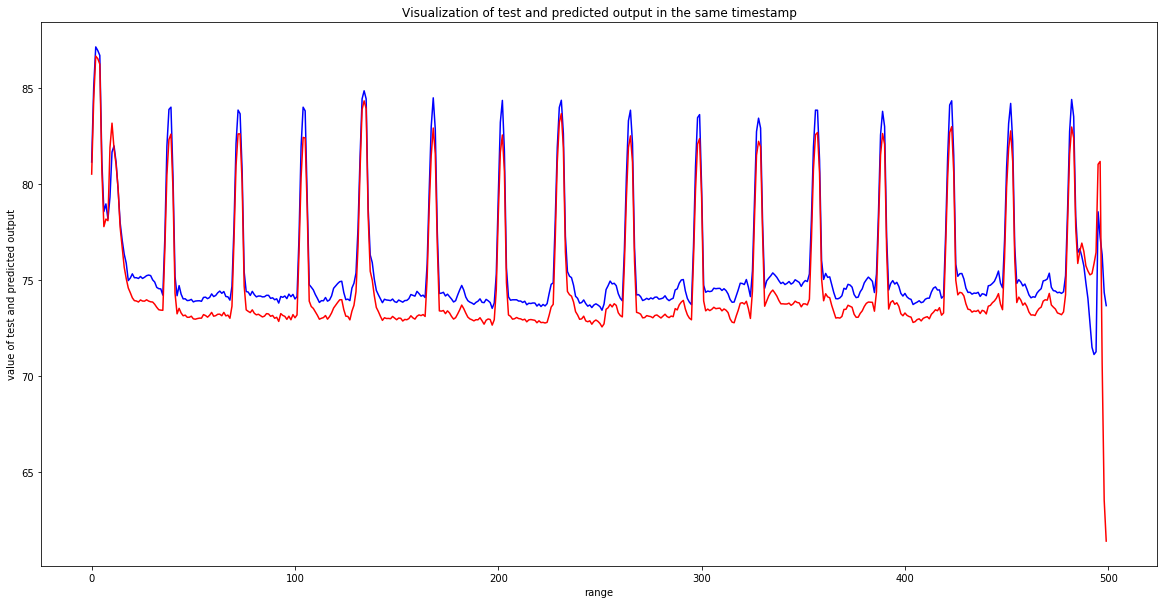

In [80]:
plot_graph(test_output_NN, predicted_output_NN, final_directory,'Neural_Network')

In [81]:
evaluation_metrices(test_output_NN,predicted_output_NN,final_directory,'Neural Netowrk', evaluation_metrics_file_path)

r_2 statistic: 0.82
Mean_absolute_error: 1.06
Mean squared error: 1.77
RMSE:  1.3285846495454539
!!!!---------------!!!!----------------!!!!


# LSTM

In [47]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [48]:
multiple_ip_train_data, multiple_ip_test_set = make_dataset_LSTM(dataframe_high_correlation, required_number_of_test_data)

go_for_training:  24803
required_number_of_test_data:  1000
percentage:  0.9612448164942061
dataset length:  25803
Number of Elements for training:  24803
LSTM train set:  (24803, 7)
LSTM test set:  (200, 7)


In [49]:
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, number_of_step_lstm)

In [50]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

X_Conv_Lstm shape:  (24801, 2, 6) 	X_Conv_Lstm size:  297612 	X_Conv_Lstm dimension:  3
y_Conv_Lstm shape:  (24801,)  size:  24801  dim:  1


In [51]:
samples = X_Conv_Lstm.shape[0]
time = number_of_step_lstm
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

In [52]:
# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [53]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('X_Conv_Lstm_train shape: ',X_Conv_Lstm_train.shape,'\tX_Conv_Lstm_train size: ',X_Conv_Lstm_train.size,'\tX_Conv_Lstm_train dimension: ',X_Conv_Lstm_train.ndim)

X_Conv_Lstm shape:  (24801, 2, 6) 	X_Conv_Lstm size:  297612 	X_Conv_Lstm dimension:  3
X_Conv_Lstm_train shape:  (24801, 2, 1, 6, 1) 	X_Conv_Lstm_train size:  297612 	X_Conv_Lstm_train dimension:  5


In [54]:
lr = 0.01

def lr_schedule(epoch):
    print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
    print('now lr_1: ', lr_1)
    return lr_1

batch_size = batch_size
epochs = 4
activation_function = 'relu'

In [56]:
model = LSTM_model(activation_function, time, rows, cols, channels)

In [58]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_2 (ConvLSTM2D)  (None, 1, 5, 64)          33536     
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 321       
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


In [60]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1,
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

W0919 15:24:59.155813 140428460881728 deprecation.py:323] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


epoch value:  0
now lr_1:  0.01
Epoch 1/4
24801/24801 [==============================] - 4s 156us/step - loss: 36.7143 - acc: 0.0000e+00
epoch value:  1
now lr_1:  0.01
Epoch 2/4
24801/24801 [==============================] - 4s 143us/step - loss: 15.6213 - acc: 0.0000e+00
epoch value:  2
now lr_1:  0.01
Epoch 3/4
24801/24801 [==============================] - 4s 142us/step - loss: 12.7111 - acc: 0.0000e+00
epoch value:  3
now lr_1:  0.01
Epoch 4/4
24801/24801 [==============================] - 4s 142us/step - loss: 9.7381 - acc: 0.0000e+00


In [71]:
# model.save_weights("CONV_LSTM_model.h5")
model.save("CONV_LSTM_model.h5")

In [72]:
from keras.models import load_model
load_trained_CONV_LSTM=load_model("CONV_LSTM_model.h5")
# load_trained_model=load_model("/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/CONV_LSTM_model.h5")

In [61]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, number_of_step_lstm)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)
print('y_Conv_Lstm_test shape: ', y_Conv_Lstm_test.shape,'\t y_Conv_Lstm_test dimension: ', y_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

X_Conv_Lstm_test shape:  (198, 2, 6) 	 X_Conv_Lstm_test dimension:  3
y_Conv_Lstm_test shape:  (198,) 	 y_Conv_Lstm_test dimension:  1


In [62]:
yhat = model.predict(x_input, verbose=1)

198/198 [==============================] - 0s 443us/step


In [73]:
yhat_loaded = load_trained_CONV_LSTM.predict(x_input, verbose=1)

198/198 [==============================] - 0s 597us/step


In [63]:
y_Conv_Lstm_test_reshape = np.reshape(y_Conv_Lstm_test,(-1,1))
y_Conv_Lstm_test_reshape.shape

(198, 1)

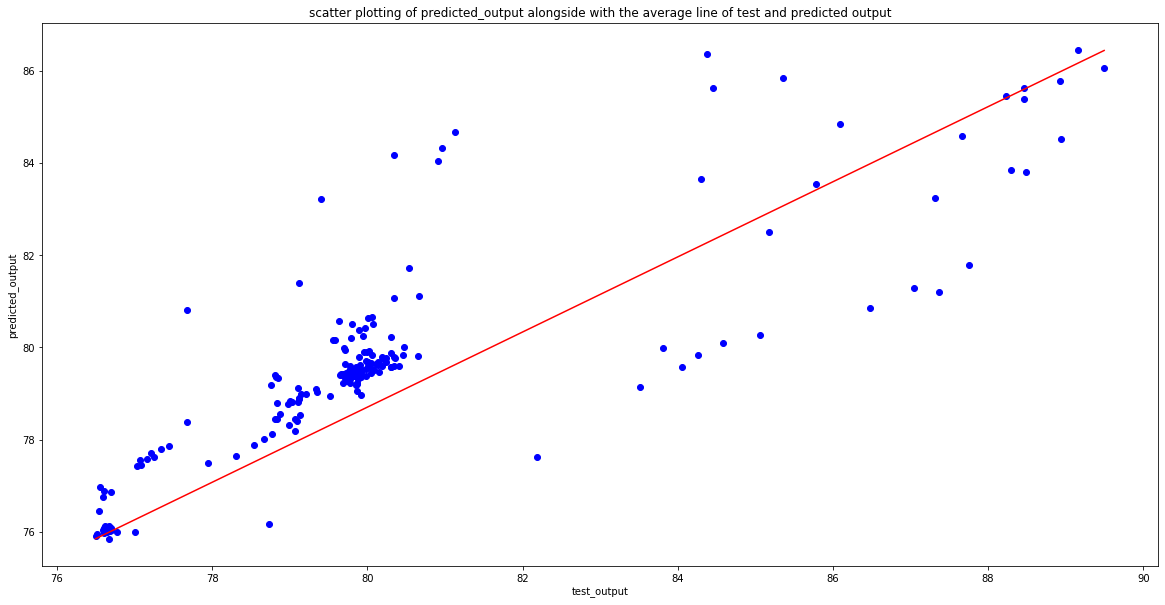

<class 'numpy.ndarray'>


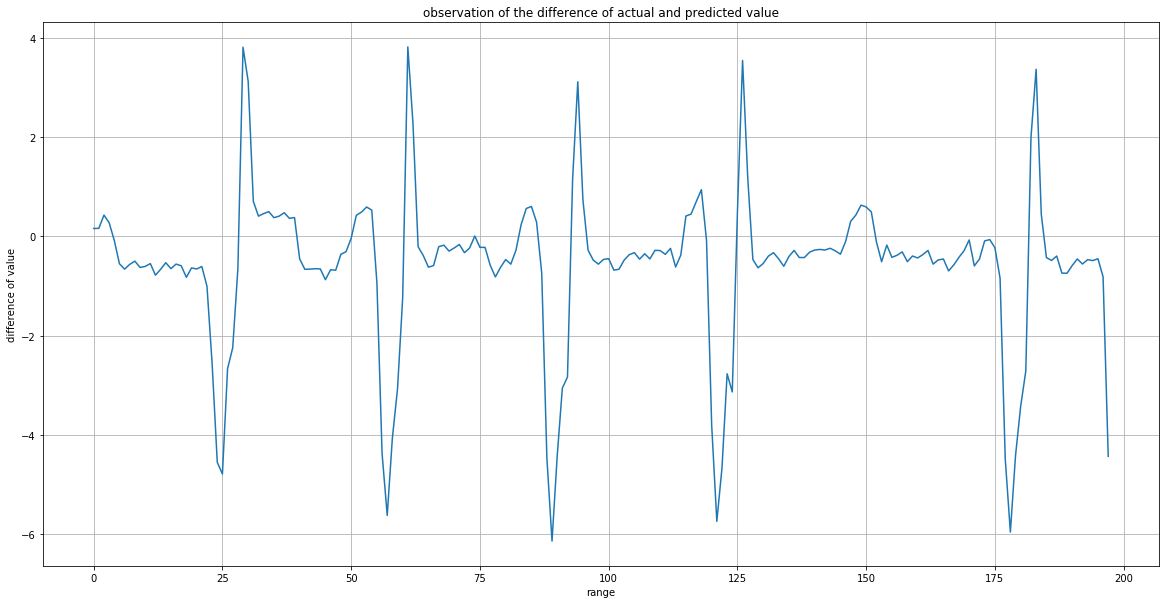

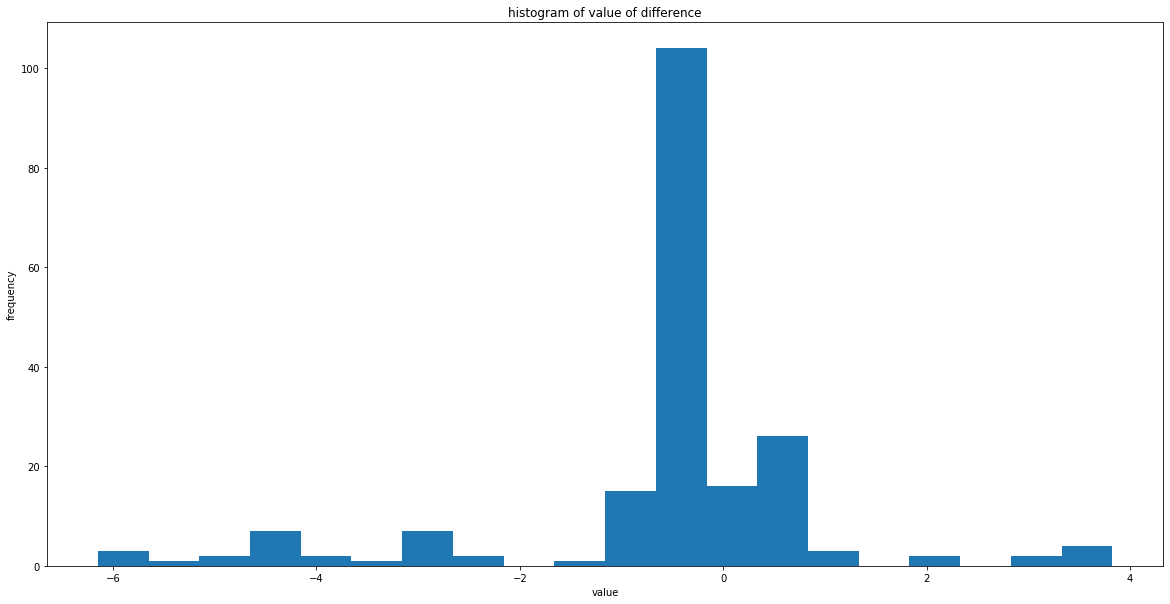

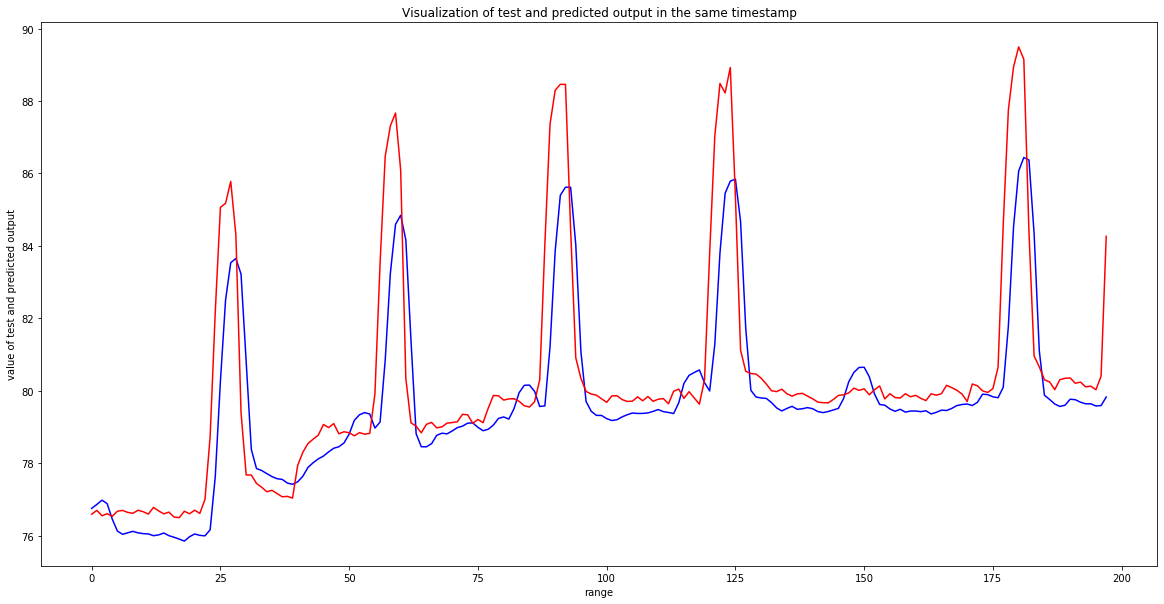

In [64]:
plot_graph(y_Conv_Lstm_test_reshape, yhat, final_directory,'CONV_LSTM')

In [74]:
evaluation_metrices(y_Conv_Lstm_test_reshape, yhat_loaded, final_directory, 'CONV_LSTM',evaluation_metrics_file_path)

r_2 statistic: 0.66
Mean_absolute_error: 1.03
Mean squared error: 2.84
RMSE:  1.6850497166021916
!!!!---------------!!!!----------------!!!!


In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)

# VANILLA LSTM

In [77]:
X_train_vanilla, y_train_vanilla = split_sequence(multiple_ip_train_data, number_of_step_lstm)

In [78]:
print('X_train_vanilla shape: ',X_train_vanilla.shape,'\t dimension: ',X_train_vanilla.ndim,'\t size: ',X_train_vanilla.size)
print('y_train_vanilla shape: ',y_train_vanilla.shape,'\t dimension: ',y_train_vanilla.ndim,'\t size: ',y_train_vanilla.size)

X_train_vanilla shape:  (24801, 2, 6) 	 dimension:  3 	 size:  297612
y_train_vanilla shape:  (24801,) 	 dimension:  1 	 size:  24801


In [79]:
X_train_vanilla = X_train_vanilla.reshape((X_train_vanilla.shape[0], X_train_vanilla.shape[1], X_train_vanilla.shape[-1]))
print(X_train_vanilla.shape)

(24801, 2, 6)


In [82]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.layers import Bidirectional
from keras import optimizers

In [116]:
def vanilla_lstm(n_steps_vanilla, n_features_vanilla):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps_vanilla, n_features_vanilla))) # this and following both lines are right
#     model.add(LSTM(50,return_sequences=True, activation='relu',input_dim=n_features, input_length=n_steps_vanilla))
#     model.add(LSTM(50,return_sequences=True))
#     model.add(LSTM(50))
    model.add(Dense(1))
    return model

In [117]:
n_steps_vanilla = number_of_step_lstm
n_features_vanilla = X_train_vanilla.shape[-1]
vanilla_model = vanilla_lstm(n_steps_vanilla, n_features_vanilla)

In [97]:
vanilla_model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [105]:
vanilla_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               42800     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 42,901
Trainable params: 42,901
Non-trainable params: 0
_________________________________________________________________


In [98]:
train_model_vanilla = vanilla_model.fit(X_train_vanilla, y_train_vanilla, batch_size=batch_size, epochs=epochs, verbose=1,
                            callbacks=[LearningRateScheduler(lr_schedule)])

epoch value:  0
now lr_1:  0.01
Epoch 1/4
24801/24801 [==============================] - 3s 116us/step - loss: 32.0729 - acc: 0.0000e+00
epoch value:  1
now lr_1:  0.01
Epoch 2/4
24801/24801 [==============================] - 3s 102us/step - loss: 12.8585 - acc: 0.0000e+00
epoch value:  2
now lr_1:  0.01
Epoch 3/4
24801/24801 [==============================] - 2s 100us/step - loss: 13.1217 - acc: 0.0000e+00
epoch value:  3
now lr_1:  0.01
Epoch 4/4
24801/24801 [==============================] - 2s 101us/step - loss: 11.3680 - acc: 0.0000e+00


In [99]:
vanilla_model.save("VANILLA_LSTM.h5")

In [100]:
load_trained_VANILLA_LSTM=load_model("VANILLA_LSTM.h5")

In [101]:
test_ip_vanilla,test_op_vanilla=split_sequence(multiple_ip_test_set,number_of_step_lstm)
n_features_test = test_ip_vanilla.shape[-1]
X_test_ip_vanilla=test_ip_vanilla.reshape((test_ip_vanilla.shape[0], test_ip_vanilla.shape[1], n_features_test))

In [102]:
yhat_vanilla_loaded = vanilla_model.predict(X_test_ip_vanilla, verbose=1)
print(yhat_vanilla_loaded.shape)

198/198 [==============================] - 0s 1ms/step
(198, 1)


In [104]:
evaluation_metrices(test_op_vanilla, yhat_vanilla_loaded, final_directory, 'VANILLA_LSTM',evaluation_metrics_file_path)

r_2 statistic: 0.44
Mean_absolute_error: 1.81
Mean squared error: 4.70
RMSE:  2.167940225690183
!!!!---------------!!!!----------------!!!!
